In [1]:
import pandas as pd
import seaborn
import pylab as pl
import statsmodels.formula.api as smf
from sklearn import datasets
from sklearn.decomposition import PCA

%pylab inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("dataInnerMerge.csv")
df1 = pd.read_csv("dataOuterMerge.csv")
index = pd.read_csv("index.csv")

In [3]:
df.head()

Unnamed: 0  zipcode  renovation_index  renovation_index_with_rent  \
0           0    10025          4.770022                    5.259394   
1           1    10023          5.238509                    5.902964   
2           2    10002          9.586100                   10.818387   
3           3    10467         13.927773                   15.485280   
4           4    11226         28.565119                   34.266632   

   drug_change_abs  drug_change_rate  petit_larceny_change_abs  \
0              -50         -0.294118                       278   
1               36          0.947368                       210   
2               64          0.205788                        23   
3              -28         -0.060086                       104   
4             -158         -0.342733                       -49   

   petit_larceny_change_rate  robbery_change_abs  robbery_change_rate  \
0                   0.282234                 -22            -0.150685   
1                   0.216942                 -10            -0.161290   
2                   0.027545                 -13            -0.071429   
3                   0.134194                 -21            -0.069307   
4                  -0.052128                -116            -0.328612   

              ...              T_change_area  PHS_change_area  VP_change_area  \
0             ...                   2.394167         8.659753       -0.509397   
1             ...                   0.920283         0.361540       -3.188123   
2             ...                  -1.217650         1.921604       -1.407908   
3             ...                  10.247177         2.091261        0.706702   
4             ...                  16.265486         4.212279        1.852388   

   MasterCard_growth_rank  subway_change_abs  subway_change_rate  \
0                  412.61         -2809525.0           -0.072370   
1                  319.46         -3237012.0           -0.027359   
2                  635.54           724502.0            0.013701   
3                  560.02          -255435.0           -0.015637   
4                  542.67           538398.0            0.019209   

   yellowTaxi_change_abs  yellowTaxi_change_rate  privateVehicle_change_abs  \
0          -1.612303e+06               -0.425340              -1.255044e+06   
1          -1.934142e+06               -0.299824              -1.540626e+06   
2          -1.103089e+06               -0.342067              -9.167520e+05   
3          -1.465088e+02               -0.074703               2.633631e+05   
4          -6.015455e+03               -0.418631               1.690581e+06   

   privateVehicle_change_rate  
0                   -0.327568  
1                   -0.238821  
2                   -0.284282  
3                   32.594680  
4                  110.430252  

[5 rows x 35 columns]

In [4]:
index.head()

Unnamed: 0    Zip  renovation_index  renovation_index_with_rent  \
0           0  10025          4.770022                    5.259394   
1           1  10023          5.238509                    5.902964   
2           2  10002          9.586100                   10.818387   
3           3  10467         13.927773                   15.485280   
4           4  11226         28.565119                   34.266632   

   business_renewal  count_new_buildings  rent_increase  \
0          0.553707                 82.0       1.102593   
1          0.374745                168.0       1.126840   
2          0.473819                559.0       1.128549   
3          0.615942                501.0       1.111827   
4          0.741337                868.0       1.199597   

   count_major_renovation  average_rent_2017  average_rent_2013  \
0                   400.0        3553.750000        3223.083333   
1                   562.0        3858.583333        3424.250000   
2                   485.0        3699.666667        3278.250000   
3                   261.0        1739.083333        1564.166667   
4                   474.0        2183.166667        1819.916667   

                                            geometry          AREA  \
0  POLYGON ((995501.6553063095 232971.115144223, ...  1.963104e+07   
1  POLYGON ((986170.3206225634 221389.1589774638,...  1.521271e+07   
2  POLYGON ((991339.8703228086 207576.7837151289,...  2.628013e+07   
3  POLYGON ((1017396.305742651 265444.4701448828,...  6.933617e+07   
4  POLYGON ((994821.4729396403 177865.7178093046,...  3.940860e+07   

   Total_building_permits  
0                   12628  
1                   13389  
2                   10066  
3                    4047  
4                    5548

In [5]:
index = index.drop(['Unnamed: 0', "renovation_index", "renovation_index_with_rent"], axis=1)

In [6]:
df = pd.merge(df, index, left_on="zipcode", right_on = "Zip")

In [7]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'renovation_index',
       'renovation_index_with_rent', 'drug_change_abs', 'drug_change_rate',
       'petit_larceny_change_abs', 'petit_larceny_change_rate',
       'robbery_change_abs', 'robbery_change_rate', 'SS_change_rate',
       'H_change_rate', 'N_change_rate', 'T_change_rate', 'PHS_change_rate',
       'VP_change_rate', 'SS_change_pop', 'H_change_pop', 'N_change_pop',
       'T_change_pop', 'PHS_change_pop', 'VP_change_pop', 'SS_change_area',
       'H_change_area', 'N_change_area', 'T_change_area', 'PHS_change_area',
       'VP_change_area', 'MasterCard_growth_rank', 'subway_change_abs',
       'subway_change_rate', 'yellowTaxi_change_abs', 'yellowTaxi_change_rate',
       'privateVehicle_change_abs', 'privateVehicle_change_rate', 'Zip',
       'business_renewal', 'count_new_buildings', 'rent_increase',
       'count_major_renovation', 'average_rent_2017', 'average_rent_2013',
       'geometry', 'AREA', 'Total_building_permits'],
      dtype='

In [8]:
df.shape

(179, 45)

# Correlation analysis for inner merge

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Drug crimes change')

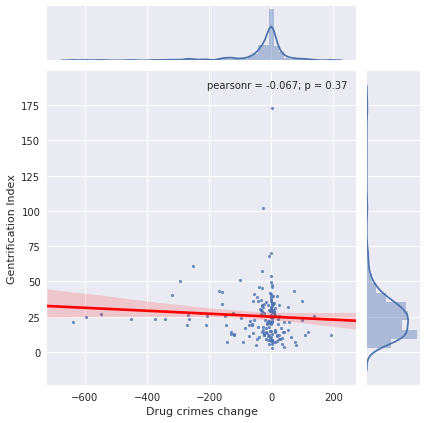

In [9]:
a = seaborn.jointplot("drug_change_abs", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Drug crimes change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Drug crimes percent change')

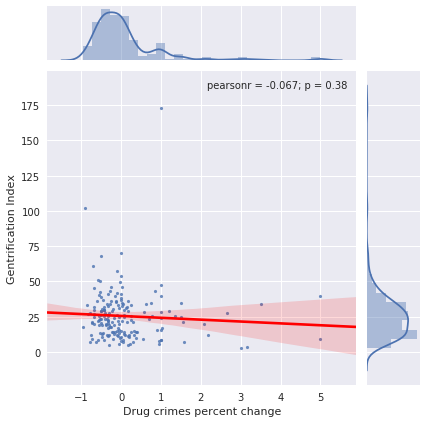

In [10]:
a = seaborn.jointplot("drug_change_rate", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Drug crimes percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Petit Larceny crimes change')

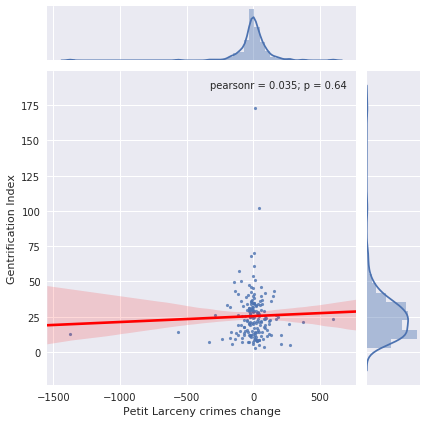

In [11]:
a = seaborn.jointplot("petit_larceny_change_abs", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Petit Larceny crimes change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Petit Larceny percent change')

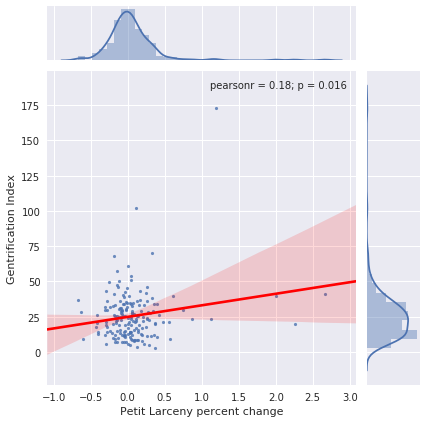

In [12]:
a = seaborn.jointplot("petit_larceny_change_rate", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Petit Larceny percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Robbery crimes change')

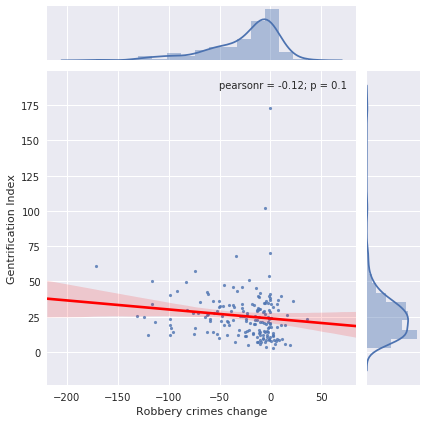

In [13]:
a = seaborn.jointplot("robbery_change_abs", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Robbery crimes change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Robbery percent change')

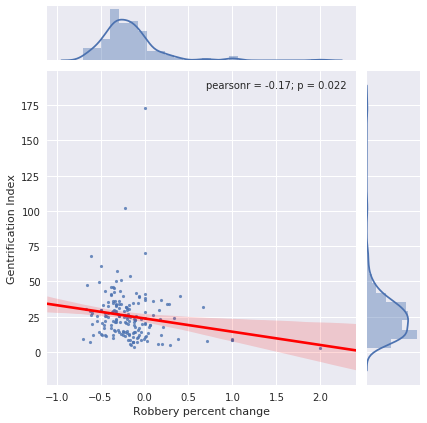

In [14]:
a = seaborn.jointplot("robbery_change_rate", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Robbery percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'SS change')

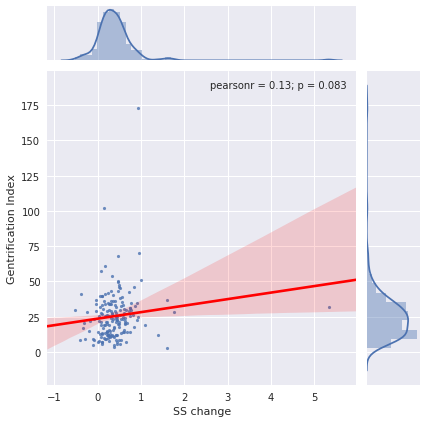

In [15]:
a = seaborn.jointplot("SS_change_rate", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("SS change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'H change')

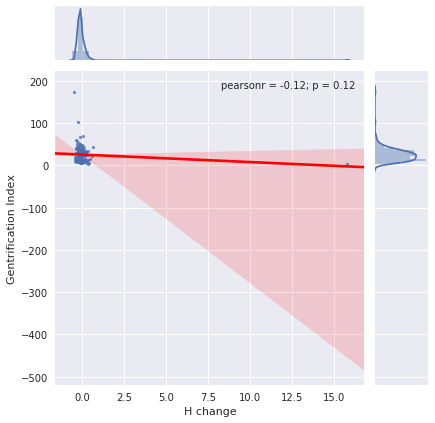

In [16]:
a = seaborn.jointplot("H_change_rate", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("H change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'N change')

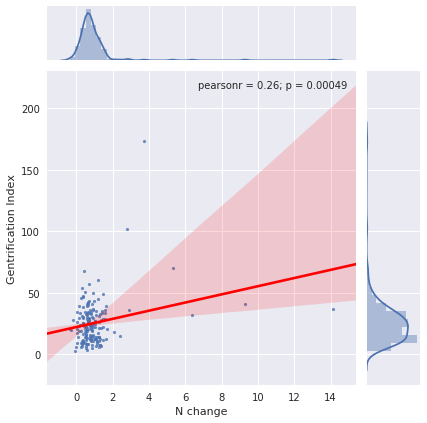

In [17]:
a = seaborn.jointplot("N_change_rate", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("N change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'T change')

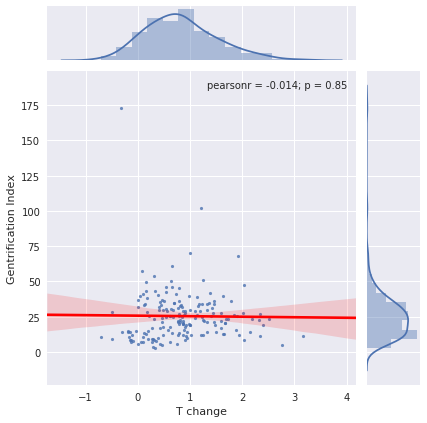

In [18]:
a = seaborn.jointplot("T_change_rate", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("T change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS change')

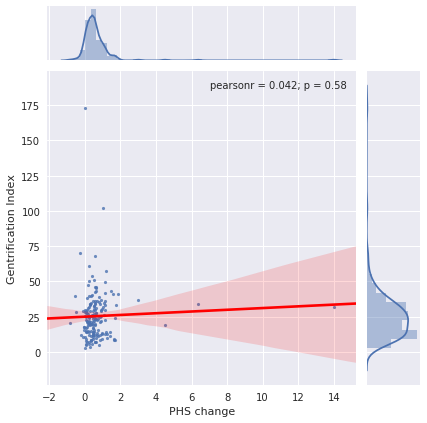

In [19]:
a = seaborn.jointplot("PHS_change_rate", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("PHS change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'VP change')

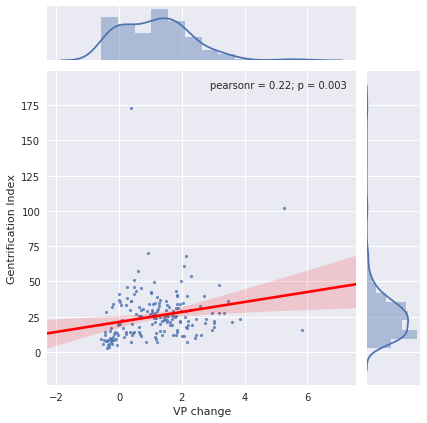

In [20]:
a = seaborn.jointplot("VP_change_rate", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("VP change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'SS change population')

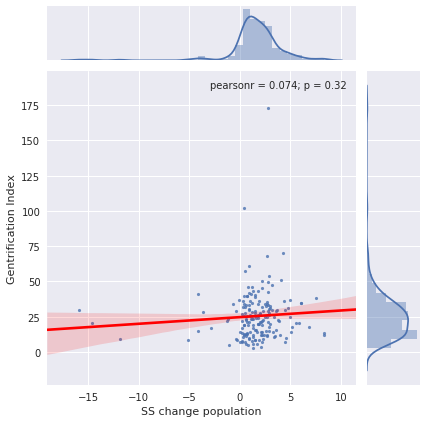

In [21]:
a = seaborn.jointplot("SS_change_pop", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("SS change population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'H change population')

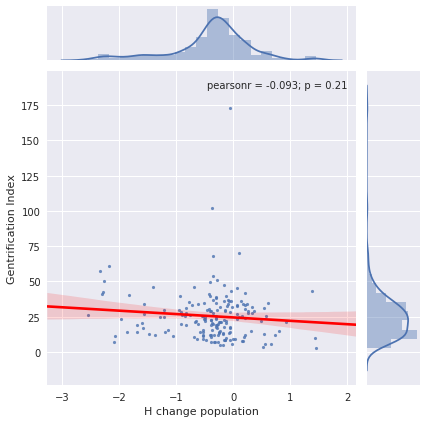

In [22]:
a = seaborn.jointplot("H_change_pop", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("H change population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'N change population')

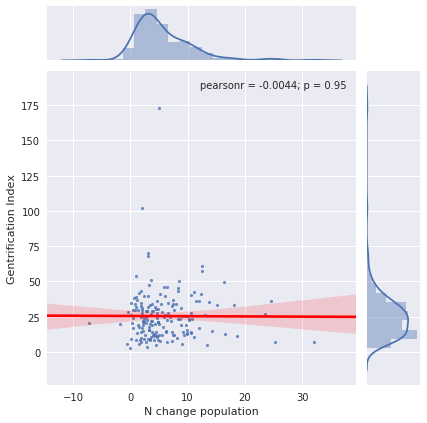

In [23]:
a = seaborn.jointplot("N_change_pop", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("N change population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'T change population')

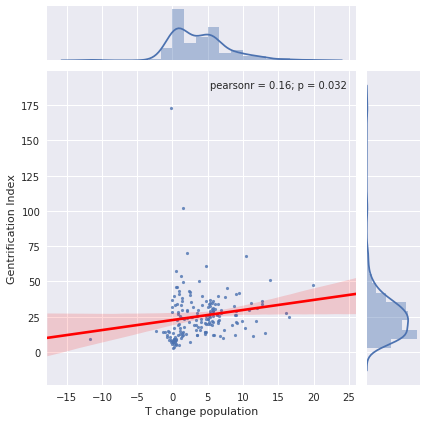

In [24]:
a = seaborn.jointplot("T_change_pop", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("T change population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS change population')

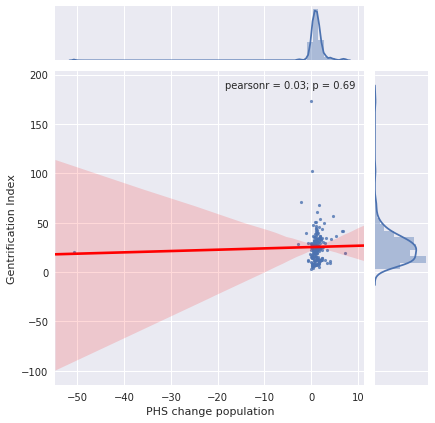

In [25]:
a = seaborn.jointplot("PHS_change_pop", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("PHS change population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'VP change population')

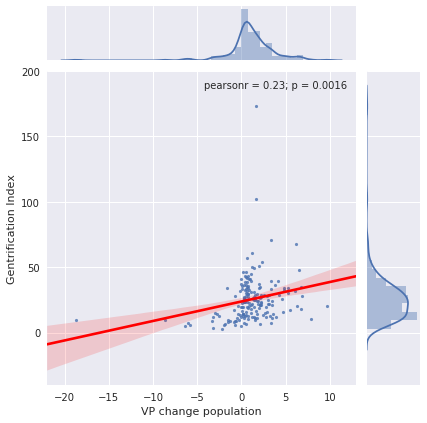

In [26]:
a = seaborn.jointplot("VP_change_pop", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("VP change population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'SS change area')

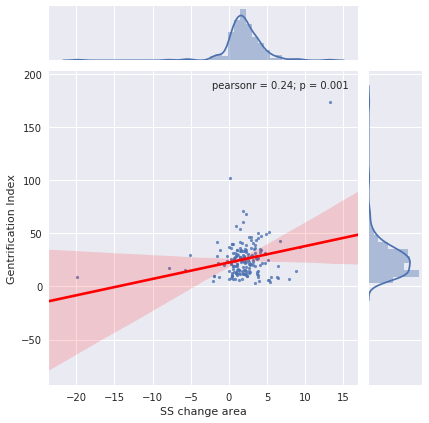

In [27]:
a = seaborn.jointplot("SS_change_area", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("SS change area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'H change area')

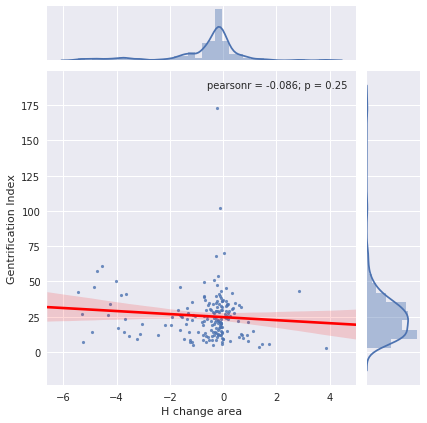

In [28]:
a = seaborn.jointplot("H_change_area", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("H change area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'N change area')

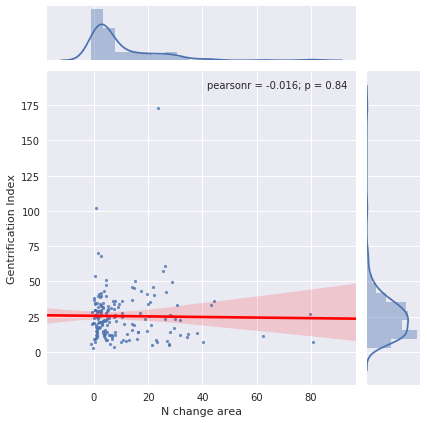

In [29]:
a = seaborn.jointplot("N_change_area", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("N change area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'T change area')

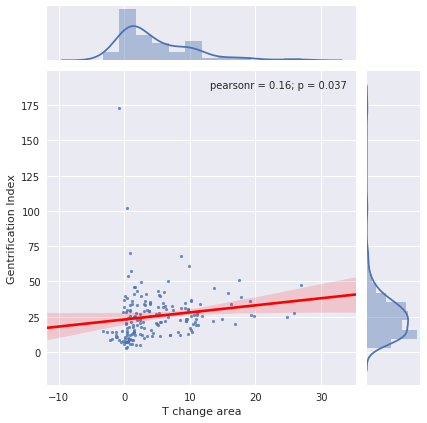

In [30]:
a = seaborn.jointplot("T_change_area", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("T change area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS change area')

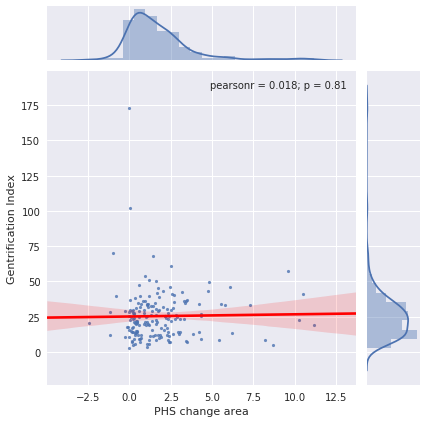

In [31]:
a = seaborn.jointplot("PHS_change_area", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("PHS change area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'VP change area')

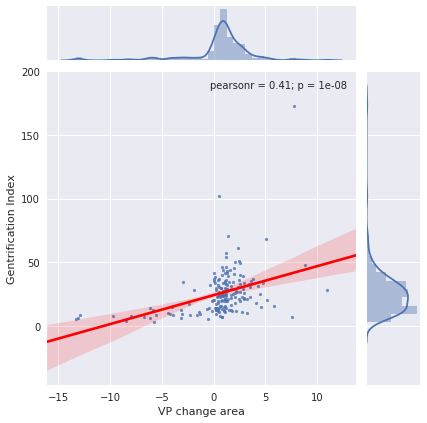

In [32]:
a = seaborn.jointplot("VP_change_area", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("VP change area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'MasterCard')

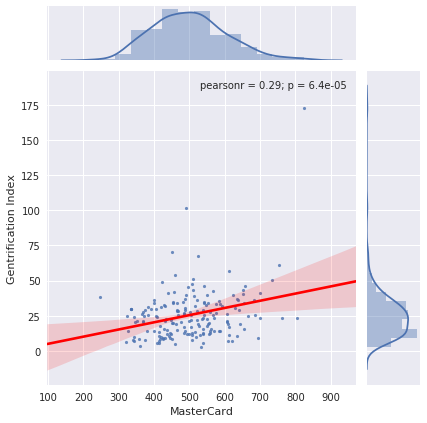

In [33]:
a = seaborn.jointplot("MasterCard_growth_rank", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("MasterCard")



/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Subway absolute change')

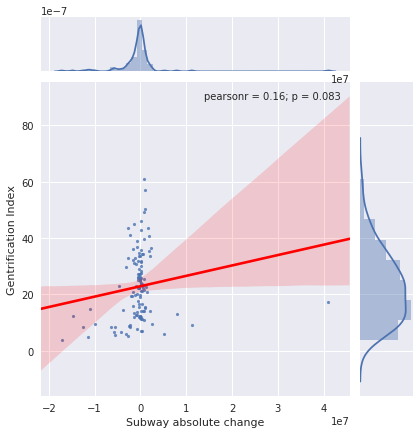

In [34]:
a = seaborn.jointplot("subway_change_abs", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Subway absolute change")


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Subway percentual change')

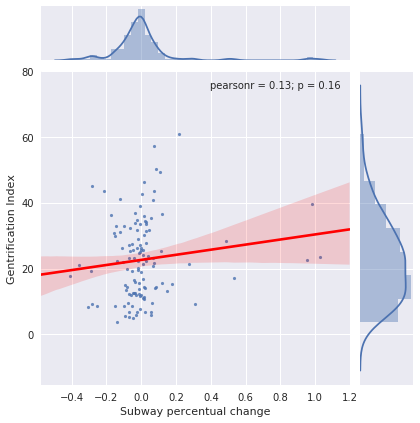

In [35]:
a = seaborn.jointplot("subway_change_rate", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Subway percentual change")


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Yellow Taxi change')

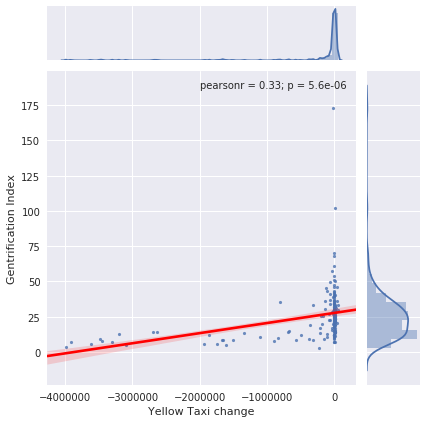

In [36]:
a = seaborn.jointplot("yellowTaxi_change_abs", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Yellow Taxi change")


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Yellow Taxi percentual change')

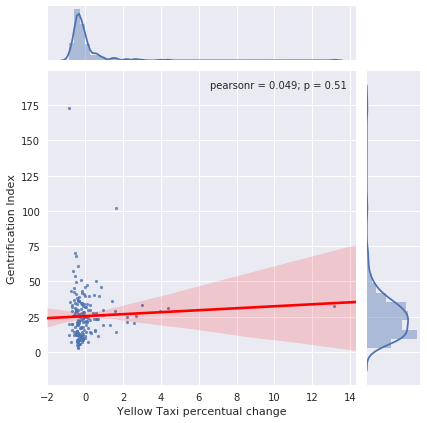

In [37]:
a = seaborn.jointplot("yellowTaxi_change_rate", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Yellow Taxi percentual change")


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Private Vehicle change')

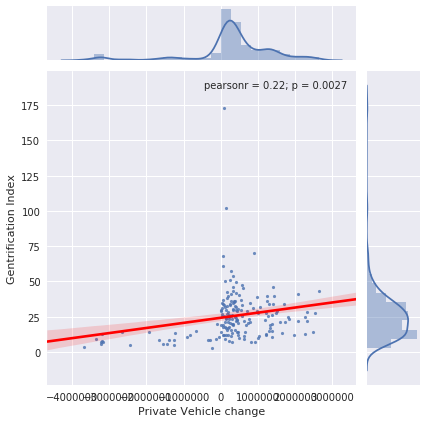

In [38]:
a = seaborn.jointplot("privateVehicle_change_abs", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Private Vehicle change")


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Private Vehicle percentual change')

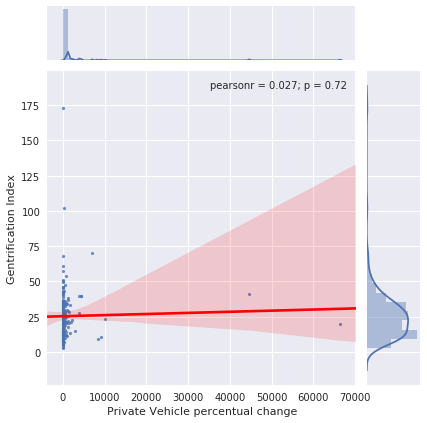

In [39]:
a = seaborn.jointplot("privateVehicle_change_rate", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Private Vehicle percentual change")


# After looking at the straight forward correlations of the variables with the centrification index we can highline the following variables, which have a statistically significant relation (alpha = 10%):

## Crime

### Petit Larceny percent change. (P = 0.016) (Coef = 0.18)
This variable has a positive significant coefficient, which is kind of counterintuitive, becaus you would expect non gentrifying neighborhoods to have less petit larceny. Nevertheless this might be combined with the robbery variable that is negative, perhaps you have less robbery and more petit larceny as a sort of "crime type replacement".

### Robbery percent change (P = 0.022) (Coef = -0.17)
This variable has a negative significant coefficient, which is correspondant to the literature, as a neighborhood gentrifies and the average income increases it is also more likely for robbery to decline. 

## 311 complaints absolute change

### Street and Sidewalk 311 complaints (P = 0.083) (Coef = 0.13)
This is a 311 type of complaint that is significant at a 10% alpha, It makes sense intuitively that as the income of a neighborhood increases the people complaining about the streets and sidewalks also increase.

### Noise 311 complaints (P = 0) (Coef = 0.26)
This is a 311 type of complaint that is significant, It makes sense intuitively that as the income of a neighborhood increases the people complaining about the noise also increase.

### Vehicles Parking 311 complaints (P = 0.03) (Coef = 0.22)
This is a 311 type of complaint that is significant, It makes sense intuitively that as the income of a neighborhood increases the people complaining about the vehicles parking in a wrong site also increase.

## 311 complaints change controlled by Zip Code population

### Transportation 311 complaints divided by population (P = 0.032) (Coef = 0.16)
This makes sense, as a neighborhood gentrifies there is a higher number of complaints per inhabitant regarding transportation.

### Vehicles Parking 311 complaints divided by population (P = 0) (Coef = 0.23)
This makes sense, as a neighborhood gentrifies there is a higher number of complaints per inhabitant regarding parking.

## 311 complaints change controlled by Zip Code area

### Street and sidewalk 311 complaints divided by area (P = 0) (Coef = 0.24)
This makes sense, as a neighborhood gentrifies there is a higher number of complaints per squarefoot in a zipcode regarding street and sidewalk.

### Transportation 311 complaints divided by area (P = 0.037) (Coef = 0.16)
This makes sense, as a neighborhood gentrifies there is a higher number of complaints per squarefoot in a zipcode regarding transportation.

### Vehicles Parking 311 complaints divided by area (P = 0) (Coef = 0.41)
This makes sense, as a neighborhood gentrifies there is a higher number of complaints per squarefoot in a zipcode regarding parking.

## Master Card

### Master Card growth rank (P = 0) (Coef = 0.29)
This makes absolute sense, the highest gentrifying neighborhoods are also seeing an increase in the credit card usage. This is a good starting point if in the future we wanted to work with a bank's data.

## Transportation

### Subway ridership absolute change (P = 0.083) (Coef = 0.16)
This is only relevant at a 10% alpha and is kind of counterintuitive. It appears that gentrifying neighborhoods also have increased their subway ridership, this might happen because there is also a population increase (just a theory).

### Yellow Taxi absolute change (P = 0) (Coef = 0.33)
This makes sense, as a neighborhood gentrifies people are more likely to take a taxi (nevertheless most of the taxi change is negative, therefore you can say that in a gentrifying neighborhood the pace at which ridership is lost is slower).

### Private Vehicle absolute change (P = 0) (Coef = 0.22)
This makes sense, as a neighborhood gentrifies people are more likely to take a private vehicle.

In [40]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'renovation_index',
       'renovation_index_with_rent', 'drug_change_abs', 'drug_change_rate',
       'petit_larceny_change_abs', 'petit_larceny_change_rate',
       'robbery_change_abs', 'robbery_change_rate', 'SS_change_rate',
       'H_change_rate', 'N_change_rate', 'T_change_rate', 'PHS_change_rate',
       'VP_change_rate', 'SS_change_pop', 'H_change_pop', 'N_change_pop',
       'T_change_pop', 'PHS_change_pop', 'VP_change_pop', 'SS_change_area',
       'H_change_area', 'N_change_area', 'T_change_area', 'PHS_change_area',
       'VP_change_area', 'MasterCard_growth_rank', 'subway_change_abs',
       'subway_change_rate', 'yellowTaxi_change_abs', 'yellowTaxi_change_rate',
       'privateVehicle_change_abs', 'privateVehicle_change_rate', 'Zip',
       'business_renewal', 'count_new_buildings', 'rent_increase',
       'count_major_renovation', 'average_rent_2017', 'average_rent_2013',
       'geometry', 'AREA', 'Total_building_permits'],
      dtype='

In [41]:

lm = smf.ols('renovation_index_with_rent ~ petit_larceny_change_rate + robbery_change_rate + SS_change_area + T_change_area  + VP_change_area + MasterCard_growth_rank + subway_change_abs + yellowTaxi_change_abs + privateVehicle_change_abs',data=df).fit()


lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     renovation_index_with_rent   R-squared:                       0.362
Model:                                    OLS   Adj. R-squared:                  0.310
Method:                         Least Squares   F-statistic:                     7.052
Date:                        Sat, 07 Jul 2018   Prob (F-statistic):           4.96e-08
Time:                                14:34:24   Log-Likelihood:                -448.98
No. Observations:                         122   AIC:                             918.0
Df Residuals:                             112   BIC:                             946.0
Df Model:                                   9                                         
Covariance Type:                    nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     9.0242      5.663      1.594      0.114        -2.196    20.245
petit_larceny_change_rate    -0.9999      3.449     -0.290      0.772        -7.835     5.835
robbery_change_rate          -5.2826      3.887     -1.359      0.177       -12.984     2.419
SS_change_area                0.4019      0.352      1.140      0.257        -0.296     1.100
T_change_area                 0.1220      0.190      0.643      0.522        -0.254     0.498
VP_change_area                0.3652      0.406      0.900      0.370        -0.439     1.169
MasterCard_growth_rank        0.0279      0.010      2.666      0.009         0.007     0.049
subway_change_abs         -2.632e-08   1.98e-07     -0.133      0.894     -4.19e-07  3.66e-07
yellowTaxi_change_abs      6.274e-06   2.11e-06      2.973      0.004      2.09e-06  1.05e-05
privateVehicle_change_abs -2.172e-06   1.57e-06     -1.385      0.169     -5.28e-06  9.36e-07
==============================================================================
Omnibus:                        5.716   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.606
Skew:                           0.525   Prob(JB):                       0.0606
Kurtosis:                       3.008   Cond. No.                     3.29e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
lm = smf.ols('renovation_index_with_rent ~ petit_larceny_change_rate + robbery_change_rate + SS_change_area + T_change_area  + VP_change_area + MasterCard_growth_rank + subway_change_abs + yellowTaxi_change_abs + privateVehicle_change_abs + N_change_rate',data=df).fit()


lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     renovation_index_with_rent   R-squared:                       0.371
Model:                                    OLS   Adj. R-squared:                  0.314
Method:                         Least Squares   F-statistic:                     6.542
Date:                        Sat, 07 Jul 2018   Prob (F-statistic):           6.85e-08
Time:                                14:34:24   Log-Likelihood:                -448.10
No. Observations:                         122   AIC:                             918.2
Df Residuals:                             111   BIC:                             949.1
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     7.7304      5.739      1.347      0.181        -3.642    19.103
petit_larceny_change_rate    -0.3925      3.473     -0.113      0.910        -7.275     6.490
robbery_change_rate          -6.1876      3.942     -1.570      0.119       -13.999     1.623
SS_change_area                0.4201      0.352      1.195      0.235        -0.277     1.117
T_change_area                 0.1732      0.194      0.895      0.373        -0.210     0.557
VP_change_area                0.3139      0.407      0.772      0.442        -0.492     1.120
MasterCard_growth_rank        0.0265      0.011      2.521      0.013         0.006     0.047
subway_change_abs          2.816e-08   2.02e-07      0.139      0.889     -3.72e-07  4.29e-07
yellowTaxi_change_abs      6.188e-06   2.11e-06      2.939      0.004      2.02e-06  1.04e-05
privateVehicle_change_abs -2.419e-06   1.58e-06     -1.535      0.128     -5.54e-06  7.04e-07
N_change_rate                 1.9129      1.510      1.267      0.208        -1.079     4.905
==============================================================================
Omnibus:                        5.784   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.583
Skew:                           0.523   Prob(JB):                       0.0613
Kurtosis:                       3.070   Cond. No.                     3.35e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
pd.DataFrame(df).corr()

Unnamed: 0   zipcode  renovation_index  \
Unnamed: 0                    1.000000 -0.009201          0.198469   
zipcode                      -0.009201  1.000000          0.382048   
renovation_index              0.198469  0.382048          1.000000   
renovation_index_with_rent    0.196704  0.425144          0.993959   
drug_change_abs               0.099973  0.024114         -0.055811   
drug_change_rate              0.151160 -0.088654         -0.054131   
petit_larceny_change_abs     -0.020677  0.063094          0.031047   
petit_larceny_change_rate     0.106732  0.032154          0.189991   
robbery_change_abs            0.341230 -0.212067         -0.100248   
robbery_change_rate           0.150351 -0.353085         -0.148079   
SS_change_rate                0.104231 -0.046414          0.135250   
H_change_rate                 0.108365 -0.066613         -0.116361   
N_change_rate                 0.168485  0.126577          0.261000   
T_change_rate                -0.018849  0.031955         -0.029648   
PHS_change_rate               0.056853 -0.144645          0.058722   
VP_change_rate                0.056767  0.473240          0.199685   
SS_change_pop                -0.036461  0.164374          0.069086   
H_change_pop                  0.070063  0.007691         -0.081841   
N_change_pop                  0.003161 -0.199118         -0.004108   
T_change_pop                  0.007882  0.482274          0.131942   
PHS_change_pop               -0.120343  0.043545          0.027485   
VP_change_pop                 0.048955  0.491678          0.215568   
SS_change_area               -0.128143  0.089820          0.250822   
H_change_area                 0.134241  0.090538         -0.069083   
N_change_area                -0.107400 -0.374005         -0.010325   
T_change_area                -0.107953  0.358689          0.130750   
PHS_change_area              -0.305081 -0.197336          0.018794   
VP_change_area                0.054022  0.533809          0.393642   
MasterCard_growth_rank        0.110729  0.041802          0.300793   
subway_change_abs             0.085526  0.132237          0.166344   
subway_change_rate            0.182006  0.228874          0.121894   
yellowTaxi_change_abs         0.229556  0.481380          0.311244   
yellowTaxi_change_rate        0.106340  0.139681          0.028240   
privateVehicle_change_abs     0.198171  0.413577          0.206331   
privateVehicle_change_rate    0.127943 -0.001395          0.031551   
Zip                          -0.009201  1.000000          0.382048   
business_renewal             -0.173136  0.050667          0.335358   
count_new_buildings          -0.276496  0.298917          0.183549   
rent_increase                 0.020292  0.478705          0.116874   
count_major_renovation       -0.477973  0.286059          0.022510   
average_rent_2017            -0.081311 -0.550634         -0.178274   
average_rent_2013            -0.088180 -0.620246         -0.195632   
AREA                         -0.177973  0.151246         -0.157696   
Total_building_permits       -0.498270 -0.352154         -0.318688   

                            renovation_index_with_rent  drug_change_abs  \
Unnamed: 0                                    0.196704         0.099973   
zipcode                                       0.425144         0.024114   
renovation_index                              0.993959        -0.055811   
renovation_index_with_rent                    1.000000        -0.066868   
drug_change_abs                              -0.066868         1.000000   
drug_change_rate                             -0.066591         0.373763   
petit_larceny_change_abs                      0.035006        -0.169574   
petit_larceny_change_rate                     0.179867        -0.047385   
robbery_change_abs                           -0.123169         0.453184   
robbery_change_rate                          -0.171400         0.073577   
SS_change_rate                                0.1297

In [44]:
X = df[["petit_larceny_change_rate" , "robbery_change_rate" , "SS_change_area" , "T_change_area","VP_change_area", "MasterCard_growth_rank", "subway_change_abs", "yellowTaxi_change_abs", "privateVehicle_change_abs"]]

Y = df[["renovation_index_with_rent"]]



In [45]:
data = pd.DataFrame(np.concatenate((Y,X),axis=1))
data.head()
print (data.shape)

(179, 10)


In [46]:
data = data.dropna()

In [47]:
data.shape

(122, 10)

[  9.29956251e-01   6.49805841e-02   5.06316462e-03   2.85030244e-10
   3.61999467e-12   9.53832125e-13   3.27525975e-13   1.46956122e-13
   3.10135903e-15]


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


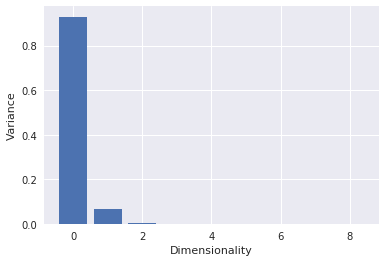

In [48]:
n=9 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(data)
eigenvalues = pca.explained_variance_ratio_
print (pca.explained_variance_ratio_)
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Variance")
plt.show()

In [49]:
eigenvalues

array([  9.29956251e-01,   6.49805841e-02,   5.06316462e-03,
         2.85030244e-10,   3.61999467e-12,   9.53832125e-13,
         3.27525975e-13,   1.46956122e-13,   3.10135903e-15])

In [50]:
Xproj.shape

(122, 9)

In [51]:
eigenvectors = pd.DataFrame(Xproj)

In [52]:
eigenvectors.head()

0             1              2           3          4         5  \
0 -2.447126e+06  1.522235e+06  -53296.123153  -57.185603   8.598641 -2.175183   
1 -2.926758e+06  1.884272e+06 -135542.245682 -138.678804   4.001133 -0.845212   
2  1.131790e+06  1.418701e+06  155830.335910  143.457838  11.986060  2.347808   
3  3.739418e+05 -3.053635e+05  306491.714676   30.660628  10.682193 -5.463807   
4  1.313624e+06 -1.316641e+06 -566131.214592   -2.385806 -10.850766 -5.858564   

          6         7         8  
0 -2.731235 -0.349606 -0.274131  
1 -2.151739  2.184052 -0.264247  
2 -4.014464  0.488188  0.153974  
3  0.523061  0.475905 -0.069289  
4  4.011851 -0.458311  0.071159

# Now we will do it for the different components of the index

In [53]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'renovation_index',
       'renovation_index_with_rent', 'drug_change_abs', 'drug_change_rate',
       'petit_larceny_change_abs', 'petit_larceny_change_rate',
       'robbery_change_abs', 'robbery_change_rate', 'SS_change_rate',
       'H_change_rate', 'N_change_rate', 'T_change_rate', 'PHS_change_rate',
       'VP_change_rate', 'SS_change_pop', 'H_change_pop', 'N_change_pop',
       'T_change_pop', 'PHS_change_pop', 'VP_change_pop', 'SS_change_area',
       'H_change_area', 'N_change_area', 'T_change_area', 'PHS_change_area',
       'VP_change_area', 'MasterCard_growth_rank', 'subway_change_abs',
       'subway_change_rate', 'yellowTaxi_change_abs', 'yellowTaxi_change_rate',
       'privateVehicle_change_abs', 'privateVehicle_change_rate', 'Zip',
       'business_renewal', 'count_new_buildings', 'rent_increase',
       'count_major_renovation', 'average_rent_2017', 'average_rent_2013',
       'geometry', 'AREA', 'Total_building_permits'],
      dtype='

## First just for new buildings

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change')

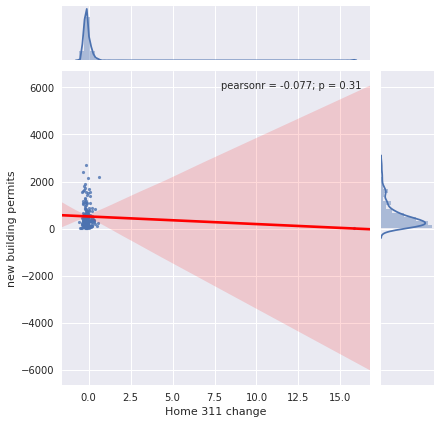

In [54]:
a = seaborn.jointplot("H_change_rate", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Home 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change normalized by population')

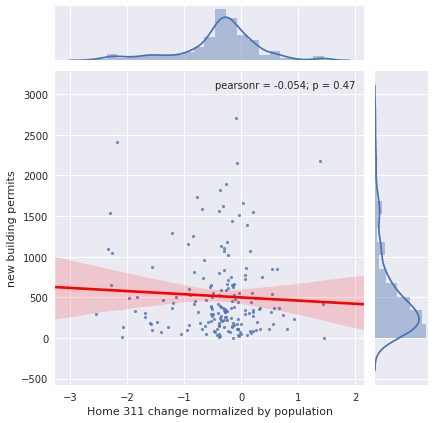

In [55]:
a = seaborn.jointplot("H_change_pop", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Home 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change normalized by area')

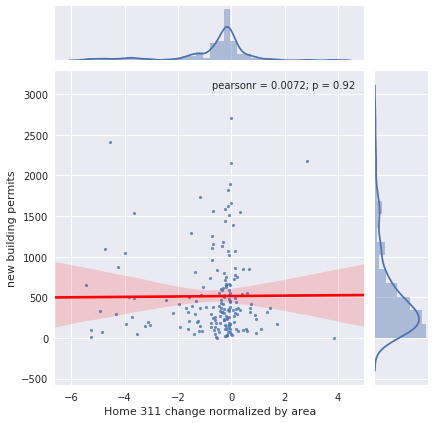

In [56]:
a = seaborn.jointplot("H_change_area", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Home 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change')

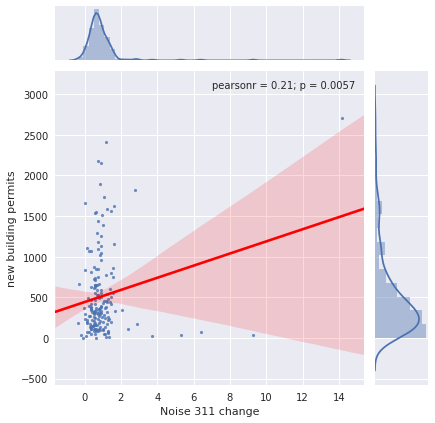

In [57]:
a = seaborn.jointplot("N_change_rate", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Noise 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change normalized by population')

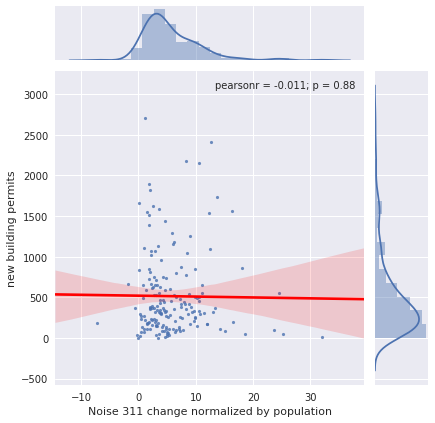

In [58]:
a = seaborn.jointplot("N_change_pop", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Noise 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change normalized by area')

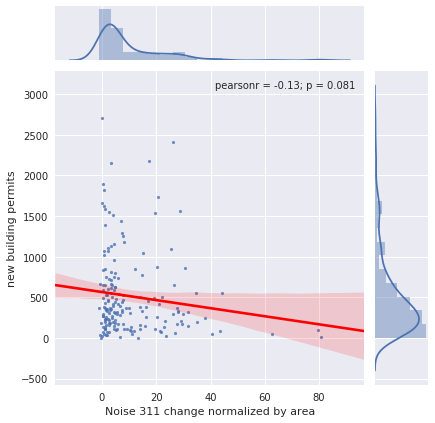

In [59]:
a = seaborn.jointplot("N_change_area", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Noise 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change')

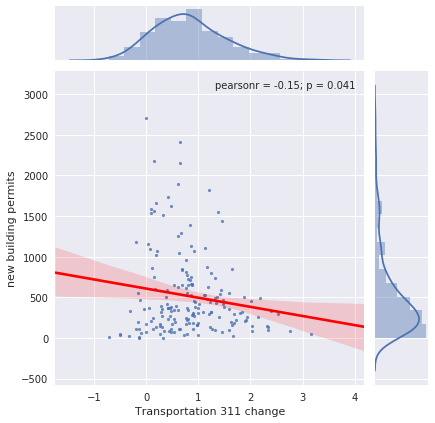

In [60]:
a = seaborn.jointplot("T_change_rate", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Transportation 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change normalized by population')

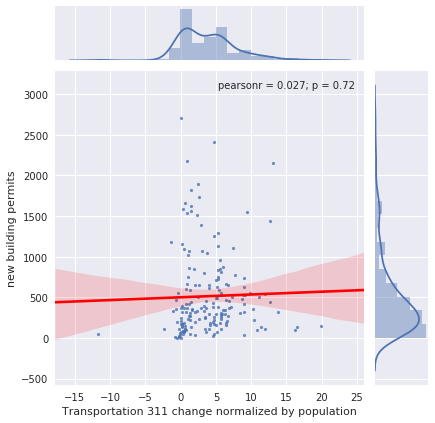

In [61]:
a = seaborn.jointplot("T_change_pop", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Transportation 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change normalized by area')

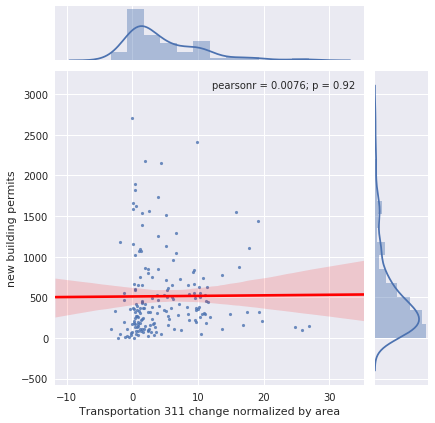

In [62]:
a = seaborn.jointplot("T_change_area", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Transportation 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change')

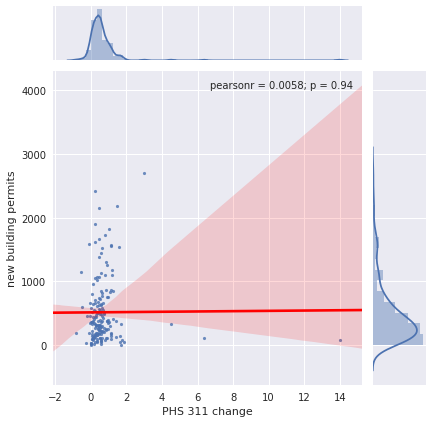

In [63]:
a = seaborn.jointplot("PHS_change_rate", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("PHS 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change normalized by population')

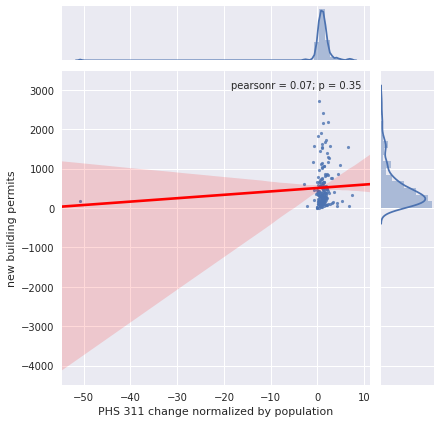

In [64]:
a = seaborn.jointplot("PHS_change_pop", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("PHS 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change normalized by area')

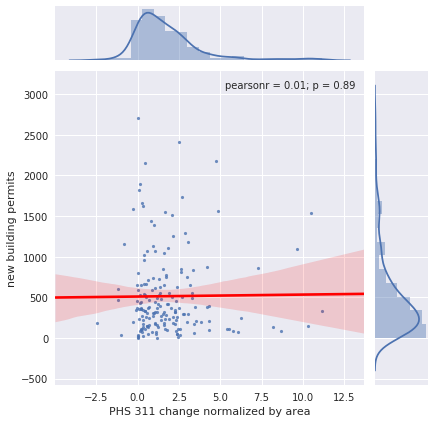

In [65]:
a = seaborn.jointplot("PHS_change_area", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("PHS 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change')

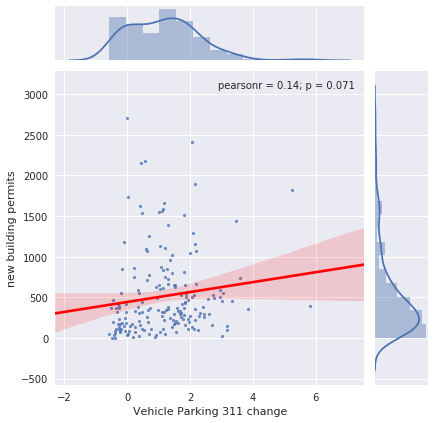

In [66]:
a = seaborn.jointplot("VP_change_rate", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Vehicle Parking 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change normalized by population')

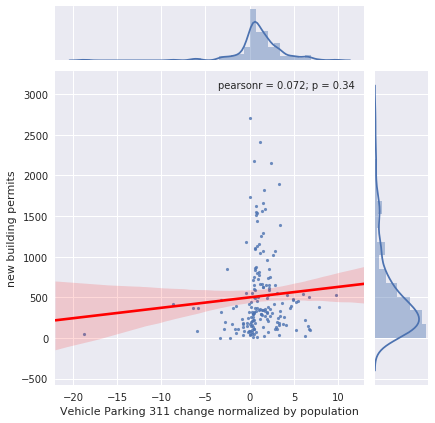

In [67]:
a = seaborn.jointplot("VP_change_pop", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Vehicle Parking 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change normalized by area')

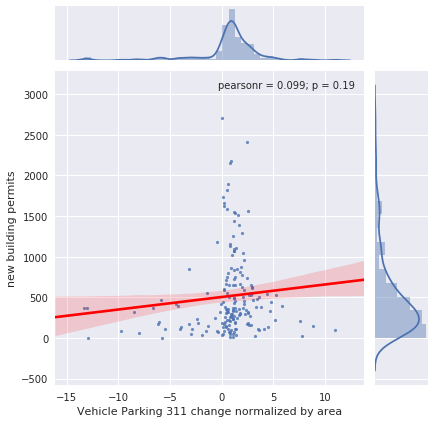

In [68]:
a = seaborn.jointplot("VP_change_area", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Vehicle Parking 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Master Card growth rank')

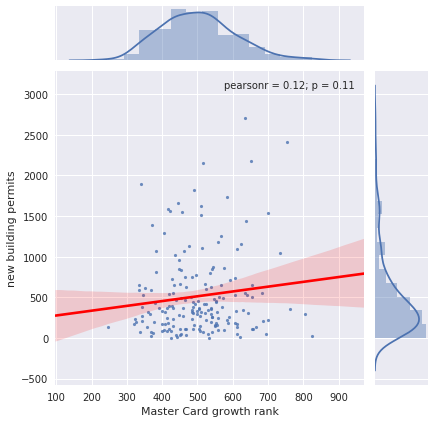

In [69]:
a = seaborn.jointplot("MasterCard_growth_rank", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Master Card growth rank")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Subway absolute change')

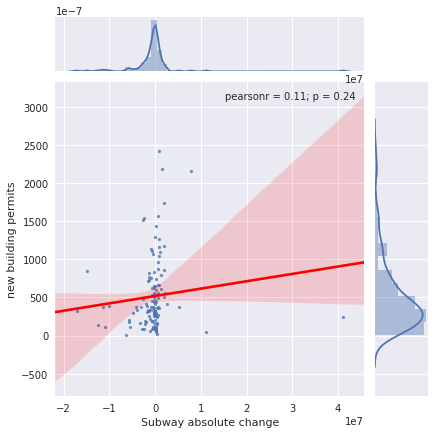

In [70]:
a = seaborn.jointplot("subway_change_abs", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Subway absolute change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Subway change rate')

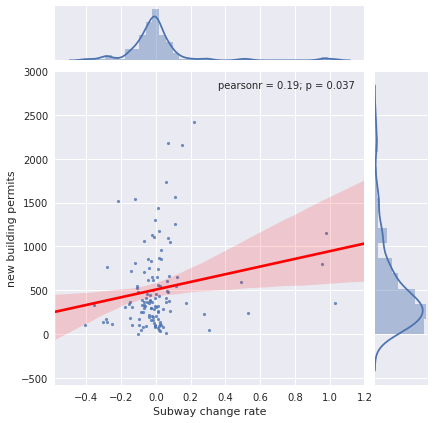

In [71]:
a = seaborn.jointplot("subway_change_rate", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Subway change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'yellow taxi absolute change')

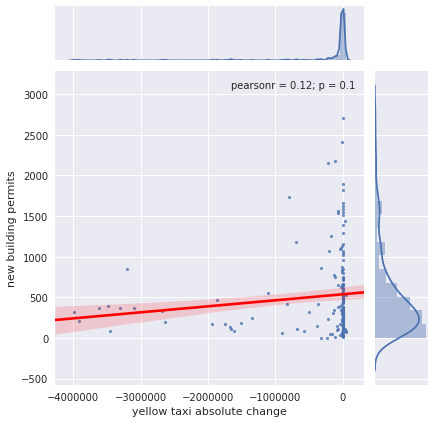

In [72]:
a = seaborn.jointplot("yellowTaxi_change_abs", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("yellow taxi absolute change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Yellow taxi change rate')

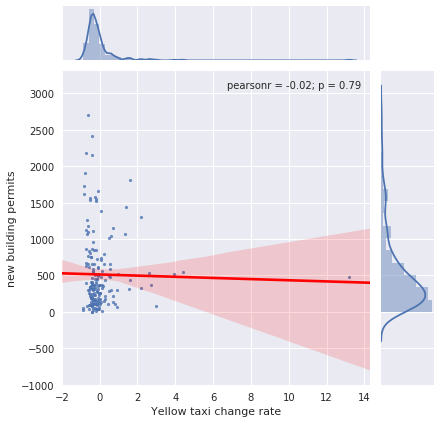

In [73]:
a = seaborn.jointplot("yellowTaxi_change_rate", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Yellow taxi change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Private Vehicle change absolute')

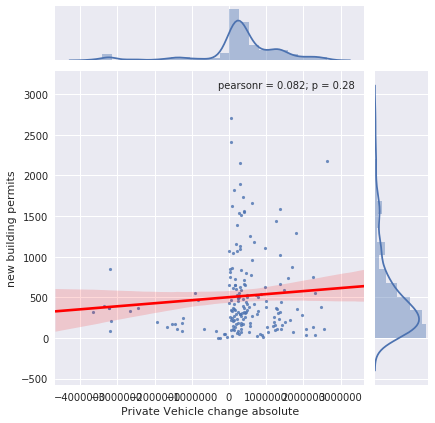

In [74]:
a = seaborn.jointplot("privateVehicle_change_abs", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Private Vehicle change absolute")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Private Vehicle change rate')

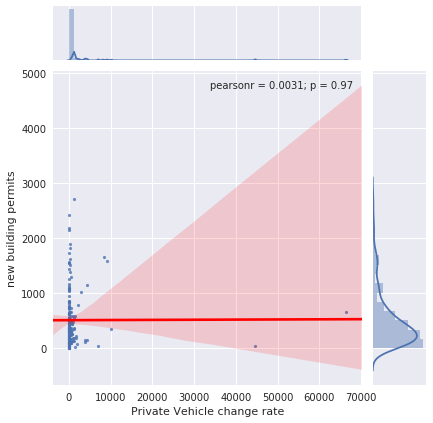

In [75]:
a = seaborn.jointplot("privateVehicle_change_rate", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Private Vehicle change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change normalized by area')

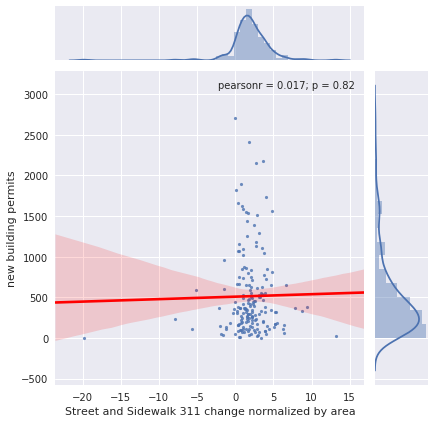

In [76]:
a = seaborn.jointplot("SS_change_area", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Street and Sidewalk 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change normalized by population')

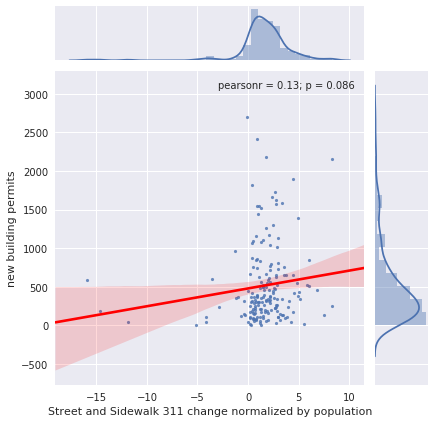

In [77]:
a = seaborn.jointplot("SS_change_pop", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Street and Sidewalk 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change')

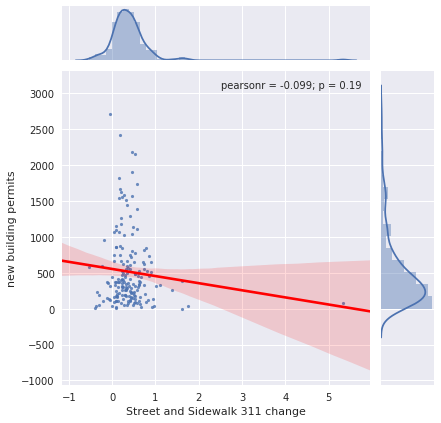

In [78]:
a = seaborn.jointplot("SS_change_rate", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Street and Sidewalk 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Robbery percent change')

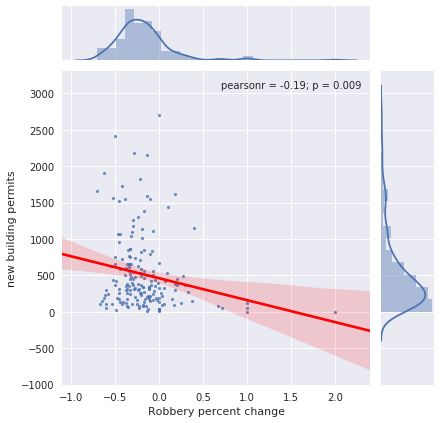

In [79]:
a = seaborn.jointplot("robbery_change_rate", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Robbery percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Robbery change')

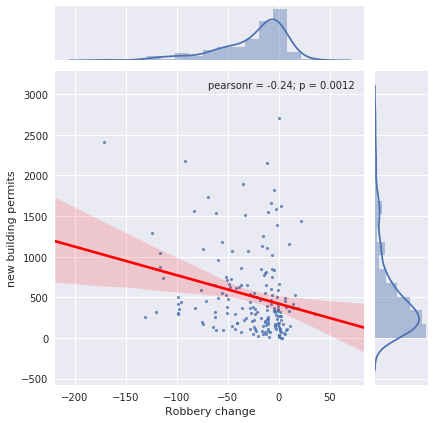

In [80]:
a = seaborn.jointplot("robbery_change_abs", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Robbery change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Petit Larceny percent change')

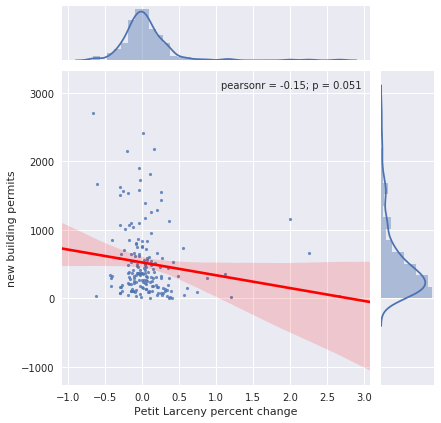

In [81]:
a = seaborn.jointplot("petit_larceny_change_rate", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Petit Larceny percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Petit Larceny change')

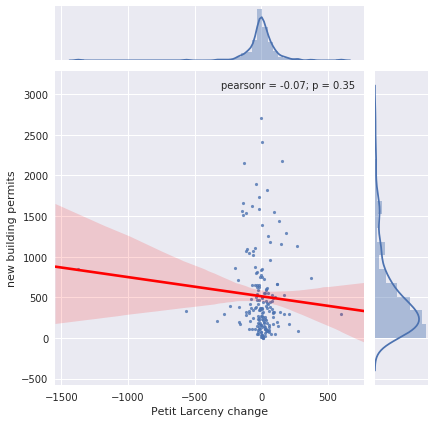

In [82]:
a = seaborn.jointplot("petit_larceny_change_abs", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Petit Larceny change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Drug crimes percent change')

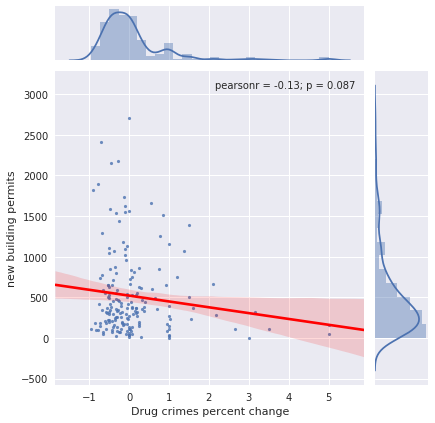

In [83]:
a = seaborn.jointplot("drug_change_rate", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Drug crimes percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Drug crimes change')

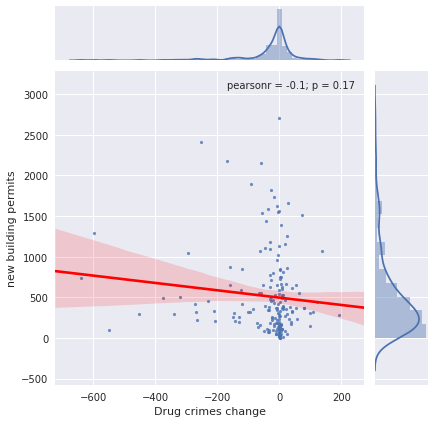

In [84]:
a = seaborn.jointplot("drug_change_abs", "count_new_buildings", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("new building permits")
pl.xlabel("Drug crimes change")

## Now just for Major Renovations

In [85]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'renovation_index',
       'renovation_index_with_rent', 'drug_change_abs', 'drug_change_rate',
       'petit_larceny_change_abs', 'petit_larceny_change_rate',
       'robbery_change_abs', 'robbery_change_rate', 'SS_change_rate',
       'H_change_rate', 'N_change_rate', 'T_change_rate', 'PHS_change_rate',
       'VP_change_rate', 'SS_change_pop', 'H_change_pop', 'N_change_pop',
       'T_change_pop', 'PHS_change_pop', 'VP_change_pop', 'SS_change_area',
       'H_change_area', 'N_change_area', 'T_change_area', 'PHS_change_area',
       'VP_change_area', 'MasterCard_growth_rank', 'subway_change_abs',
       'subway_change_rate', 'yellowTaxi_change_abs', 'yellowTaxi_change_rate',
       'privateVehicle_change_abs', 'privateVehicle_change_rate', 'Zip',
       'business_renewal', 'count_new_buildings', 'rent_increase',
       'count_major_renovation', 'average_rent_2017', 'average_rent_2013',
       'geometry', 'AREA', 'Total_building_permits'],
      dtype='

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change')

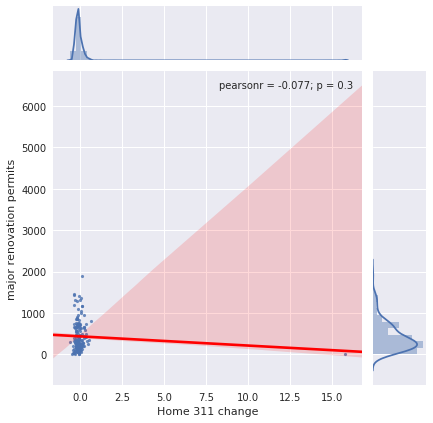

In [86]:
a = seaborn.jointplot("H_change_rate", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Home 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change normalized by population')

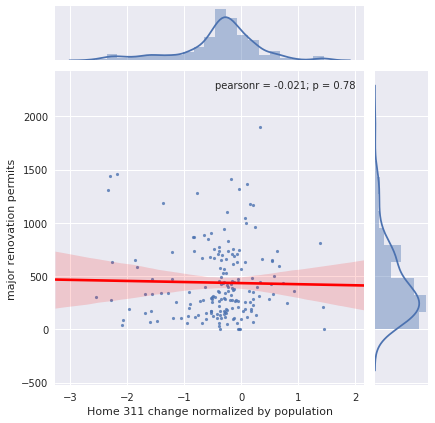

In [87]:
a = seaborn.jointplot("H_change_pop", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Home 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change normalized by area')

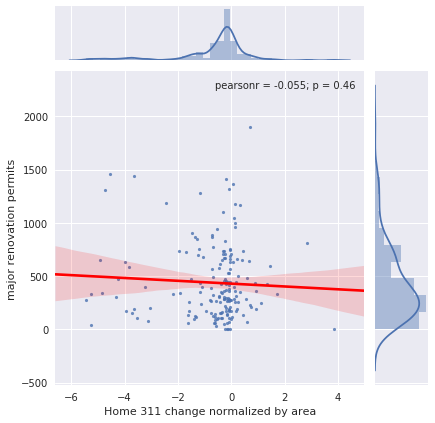

In [88]:
a = seaborn.jointplot("H_change_area", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Home 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change')

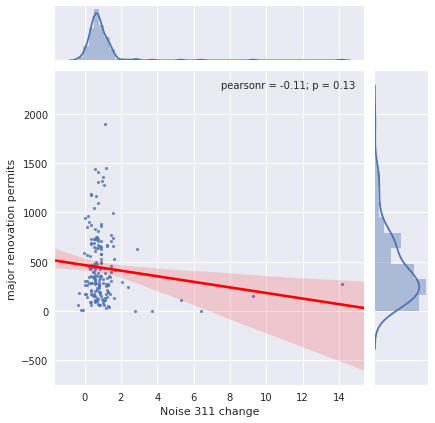

In [89]:
a = seaborn.jointplot("N_change_rate", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Noise 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change normalized by population')

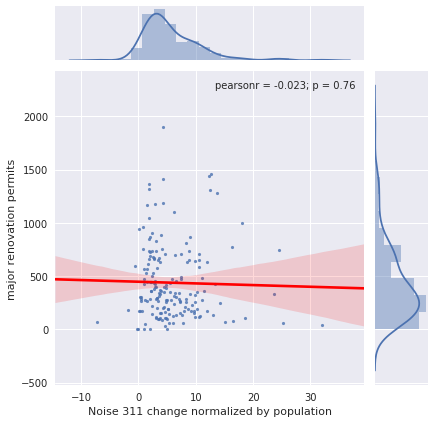

In [90]:
a = seaborn.jointplot("N_change_pop", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Noise 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change normalized by area')

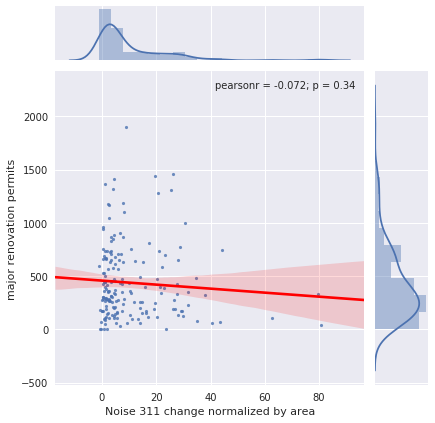

In [91]:
a = seaborn.jointplot("N_change_area", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Noise 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change')

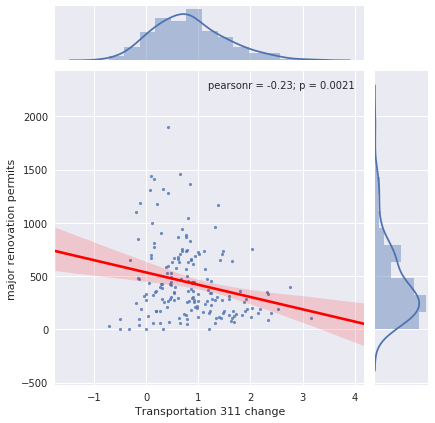

In [92]:
a = seaborn.jointplot("T_change_rate", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Transportation 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change normalized by population')

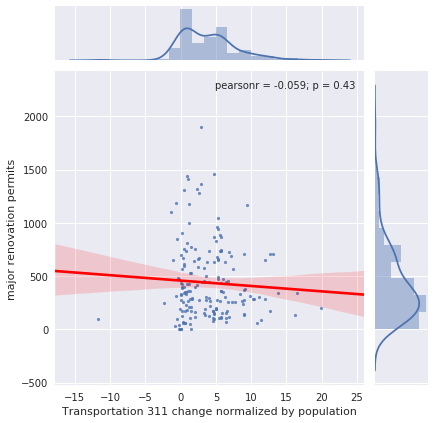

In [93]:
a = seaborn.jointplot("T_change_pop", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Transportation 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change normalized by area')

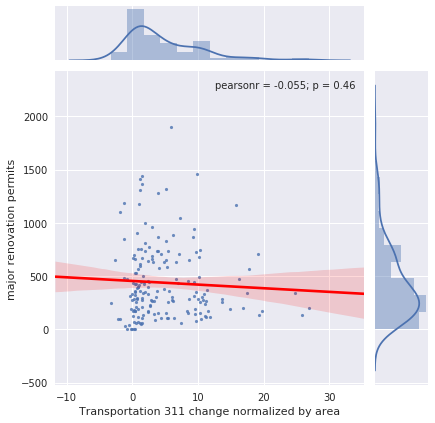

In [94]:
a = seaborn.jointplot("T_change_area", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Transportation 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change')

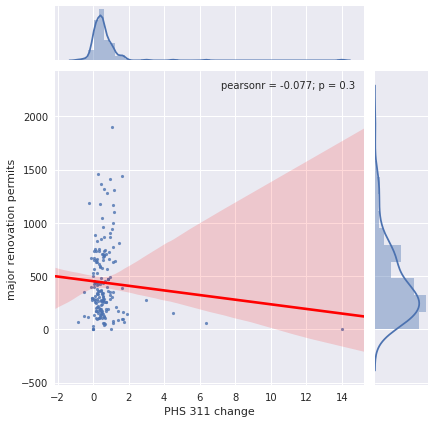

In [95]:
a = seaborn.jointplot("PHS_change_rate", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("PHS 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change normalized by population')

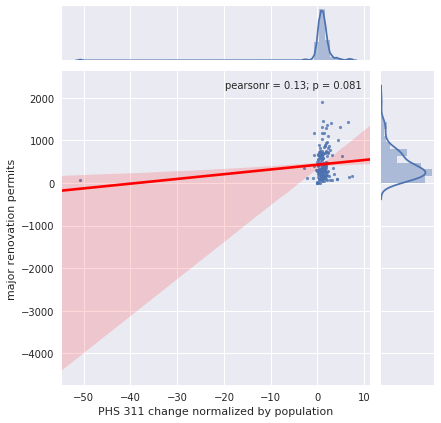

In [96]:
a = seaborn.jointplot("PHS_change_pop", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("PHS 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change normalized by area')

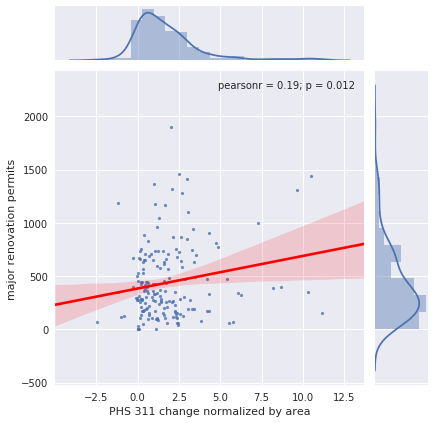

In [97]:
a = seaborn.jointplot("PHS_change_area", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("PHS 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change')

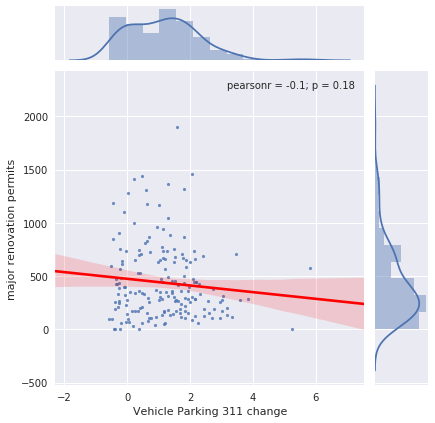

In [98]:
a = seaborn.jointplot("VP_change_rate", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Vehicle Parking 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change normalized by population')

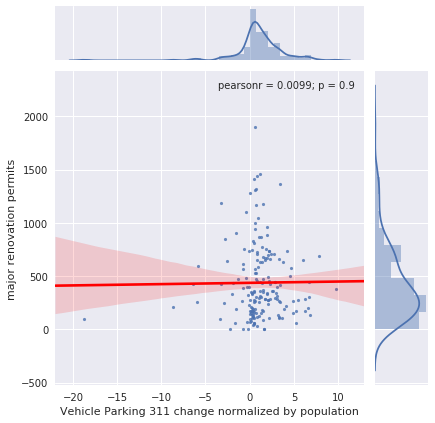

In [99]:
a = seaborn.jointplot("VP_change_pop", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Vehicle Parking 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change normalized by area')

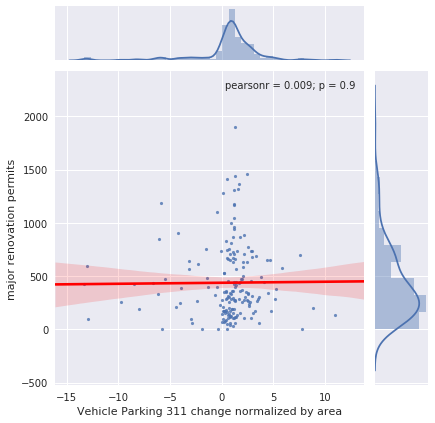

In [100]:
a = seaborn.jointplot("VP_change_area", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Vehicle Parking 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Master Card growth rank')

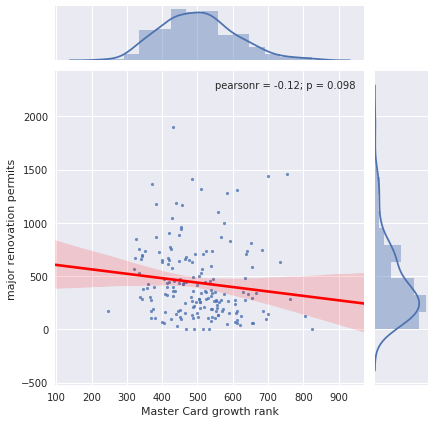

In [101]:
a = seaborn.jointplot("MasterCard_growth_rank", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Master Card growth rank")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Subway absolute change')

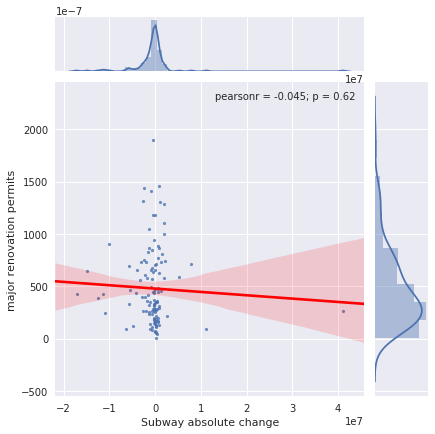

In [102]:
a = seaborn.jointplot("subway_change_abs", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Subway absolute change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Subway change rate')

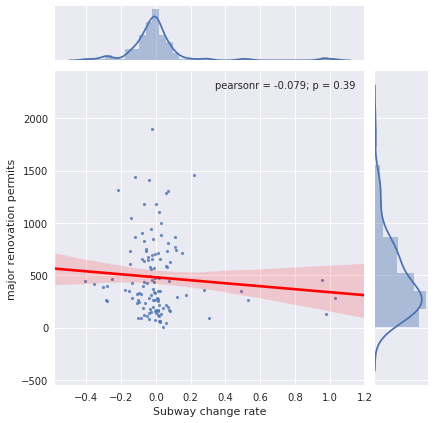

In [103]:
a = seaborn.jointplot("subway_change_rate", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Subway change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'yellow taxi absolute change')

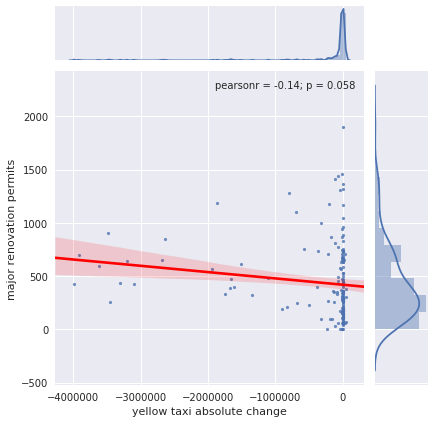

In [104]:
a = seaborn.jointplot("yellowTaxi_change_abs", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("yellow taxi absolute change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Yellow taxi change rate')

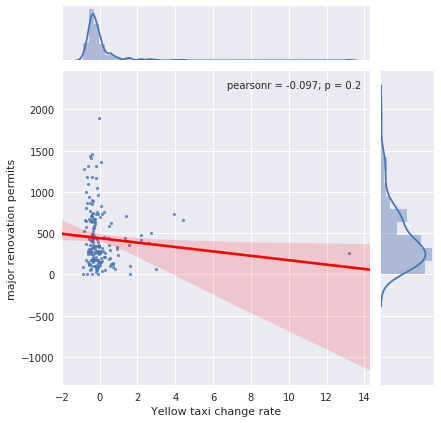

In [105]:
a = seaborn.jointplot("yellowTaxi_change_rate", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Yellow taxi change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Private Vehicle change absolute')

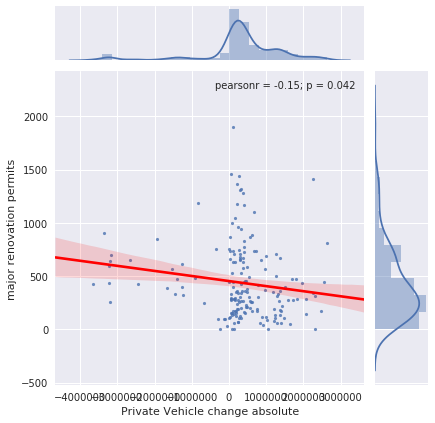

In [106]:
a = seaborn.jointplot("privateVehicle_change_abs", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Private Vehicle change absolute")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Private Vehicle change rate')

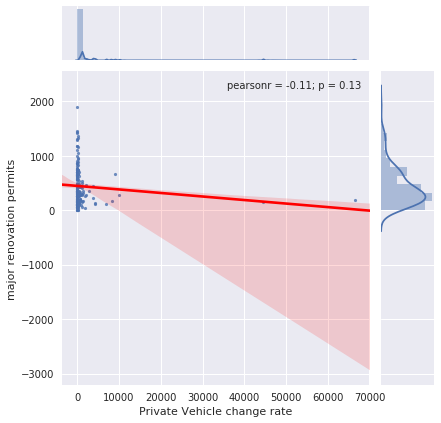

In [108]:
a = seaborn.jointplot("privateVehicle_change_rate", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Private Vehicle change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change normalized by area')

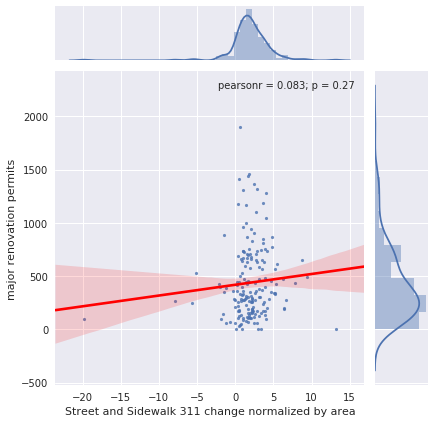

In [109]:
a = seaborn.jointplot("SS_change_area", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Street and Sidewalk 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change normalized by population')

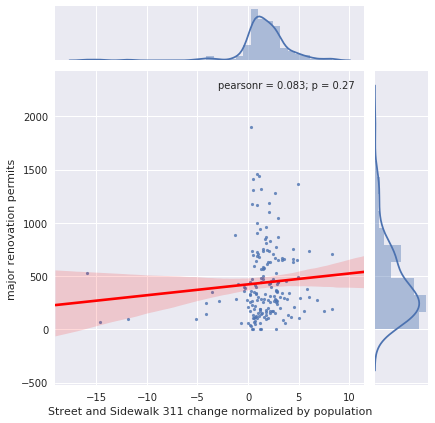

In [110]:
a = seaborn.jointplot("SS_change_pop", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Street and Sidewalk 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change')

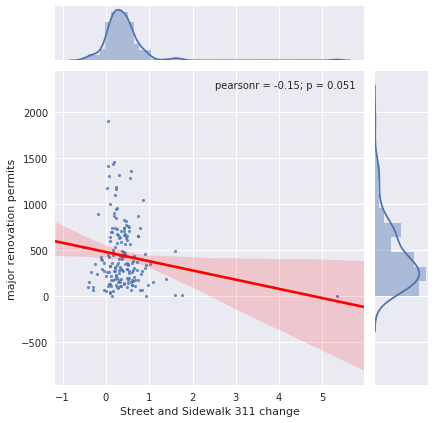

In [111]:
a = seaborn.jointplot("SS_change_rate", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Street and Sidewalk 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Robbery percent change')

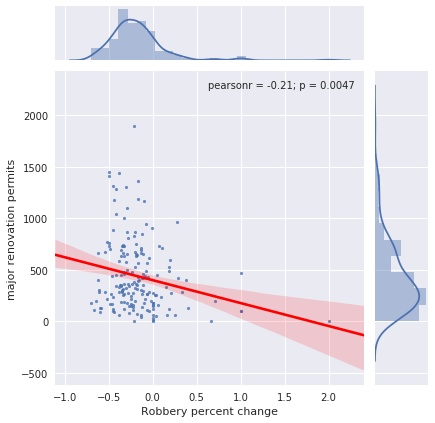

In [112]:
a = seaborn.jointplot("robbery_change_rate", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Robbery percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Robbery change')

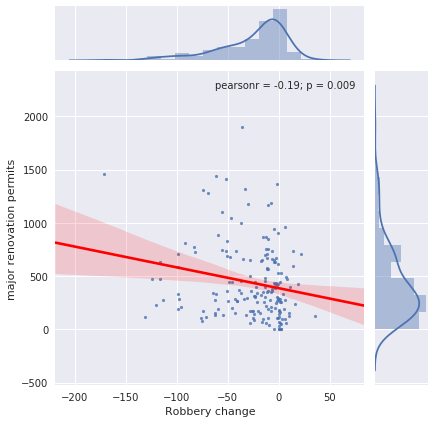

In [113]:
a = seaborn.jointplot("robbery_change_abs", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Robbery change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Petit Larceny percent change')

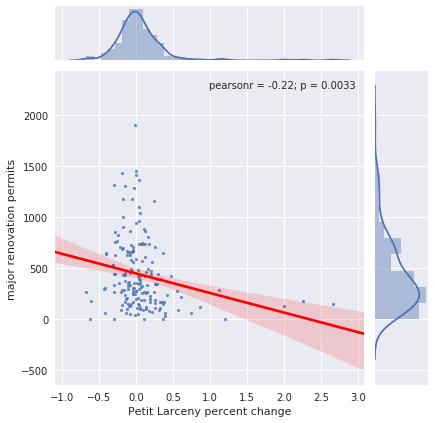

In [114]:
a = seaborn.jointplot("petit_larceny_change_rate", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Petit Larceny percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Petit Larceny change')

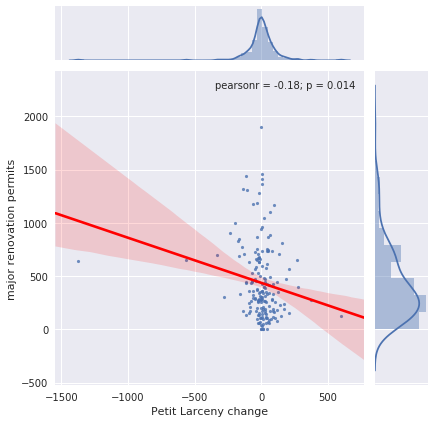

In [115]:
a = seaborn.jointplot("petit_larceny_change_abs", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Petit Larceny change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Drug crimes percent change')

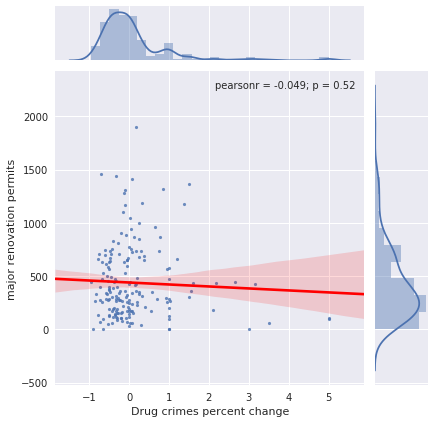

In [116]:
a = seaborn.jointplot("drug_change_rate", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Drug crimes percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Drug crimes change')

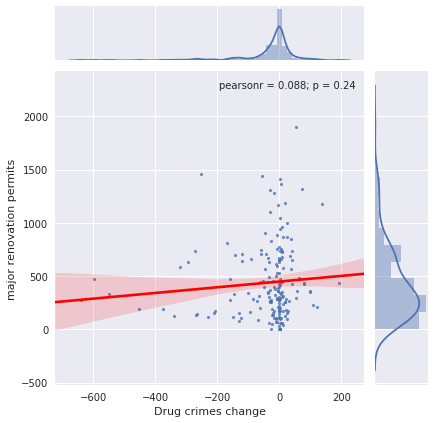

In [117]:
a = seaborn.jointplot("drug_change_abs", "count_major_renovation", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("major renovation permits")
pl.xlabel("Drug crimes change")

## Now just for our "Economic renovation variable" New licenses / Renewal licenses (Business)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change')

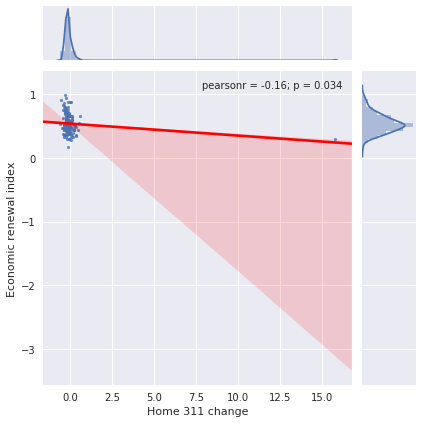

In [118]:
a = seaborn.jointplot("H_change_rate", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Home 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change normalized by population')

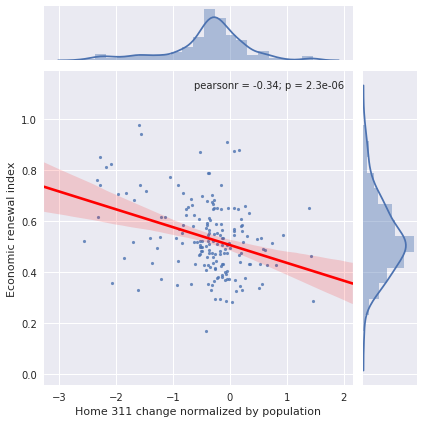

In [119]:
a = seaborn.jointplot("H_change_pop", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Home 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change normalized by area')

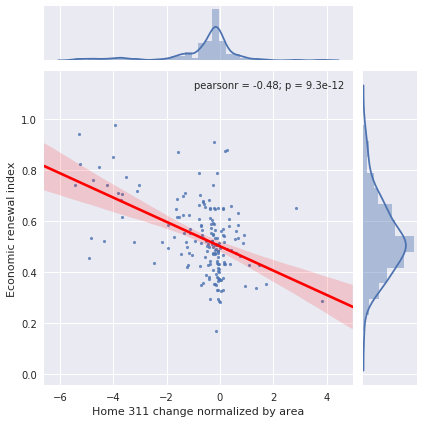

In [120]:
a = seaborn.jointplot("H_change_area", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Home 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change')

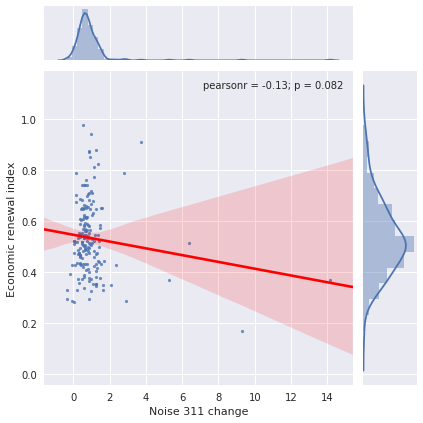

In [121]:
a = seaborn.jointplot("N_change_rate", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Noise 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change normalized by population')

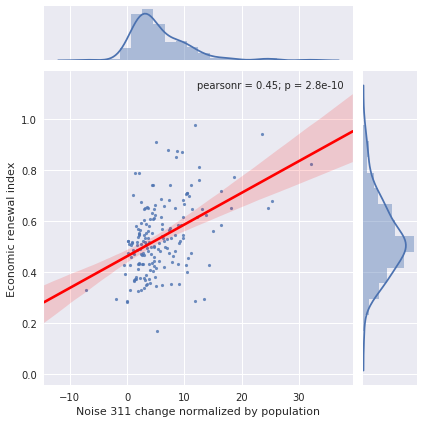

In [122]:
a = seaborn.jointplot("N_change_pop", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Noise 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change normalized by area')

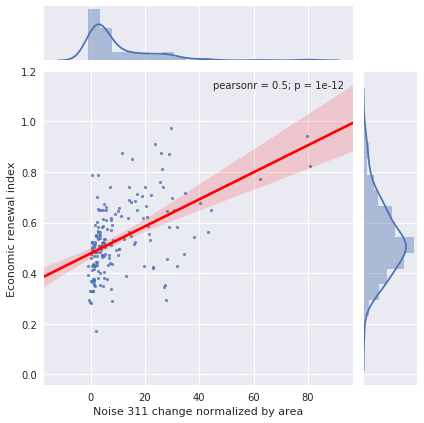

In [123]:
a = seaborn.jointplot("N_change_area", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Noise 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change')

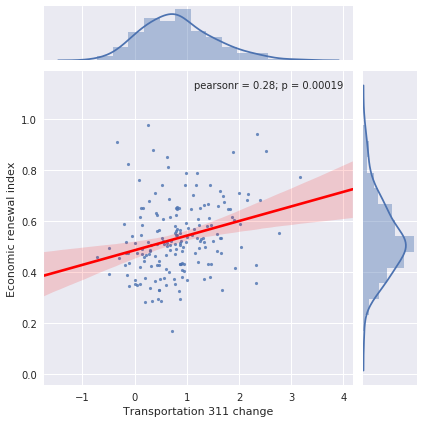

In [124]:
a = seaborn.jointplot("T_change_rate", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Transportation 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change normalized by population')

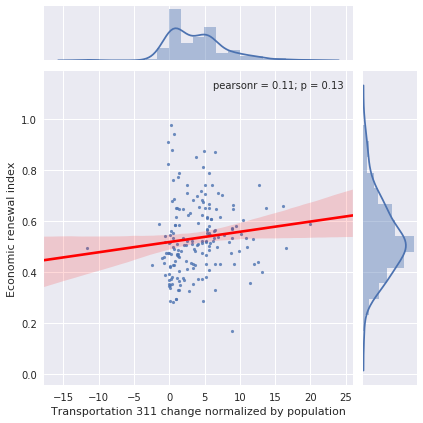

In [125]:
a = seaborn.jointplot("T_change_pop", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Transportation 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change normalized by area')

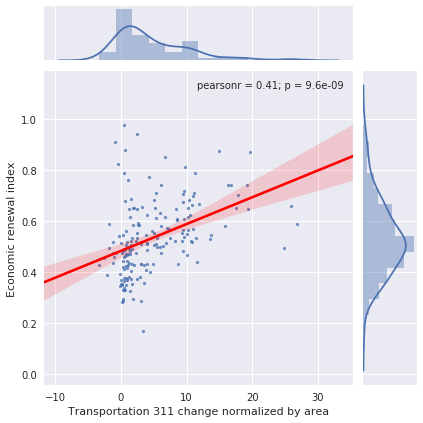

In [126]:
a = seaborn.jointplot("T_change_area", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Transportation 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change')

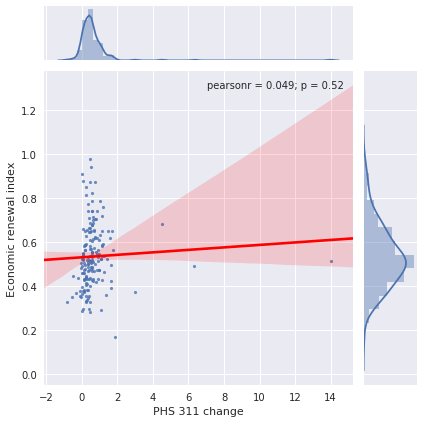

In [127]:
a = seaborn.jointplot("PHS_change_rate", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("PHS 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change normalized by population')

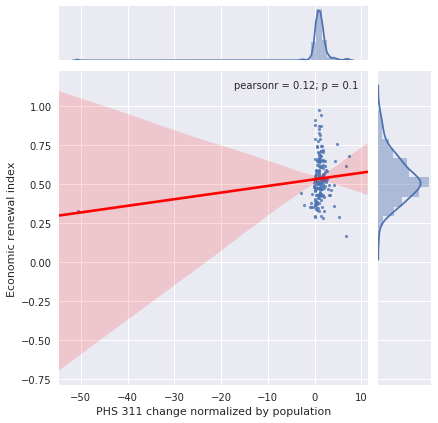

In [128]:
a = seaborn.jointplot("PHS_change_pop", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("PHS 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change normalized by area')

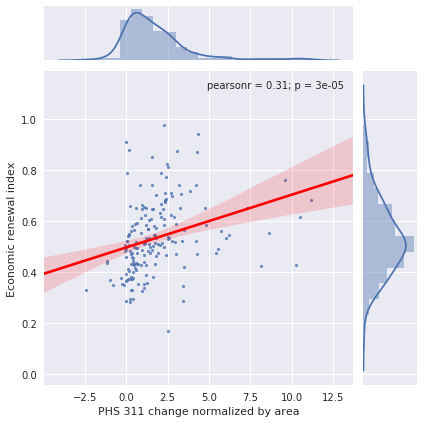

In [129]:
a = seaborn.jointplot("PHS_change_area", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("PHS 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change')

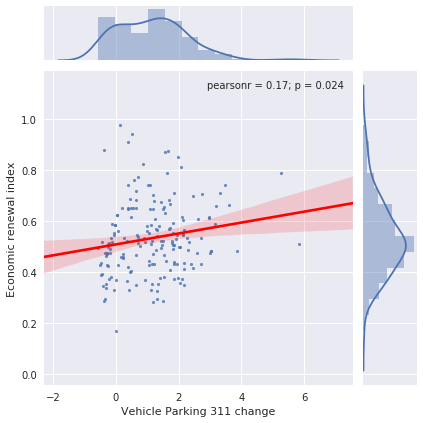

In [130]:
a = seaborn.jointplot("VP_change_rate", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Vehicle Parking 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change normalized by population')

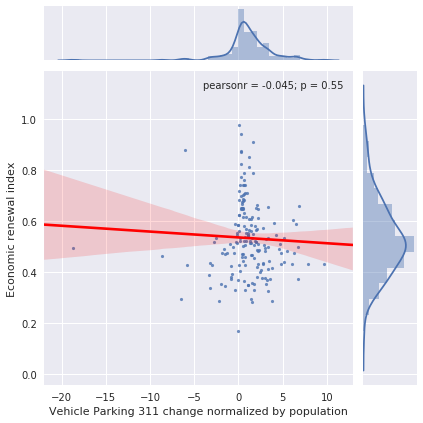

In [131]:
a = seaborn.jointplot("VP_change_pop", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Vehicle Parking 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change normalized by area')

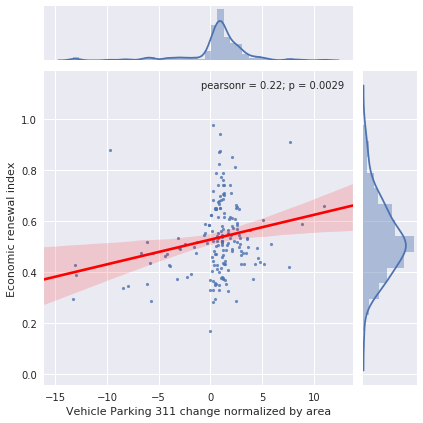

In [132]:
a = seaborn.jointplot("VP_change_area", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Vehicle Parking 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Master Card growth rank')

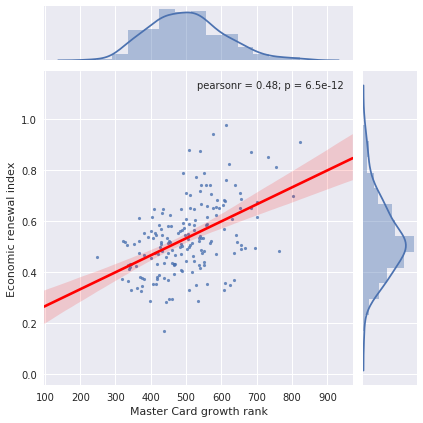

In [133]:
a = seaborn.jointplot("MasterCard_growth_rank", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Master Card growth rank")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Subway absolute change')

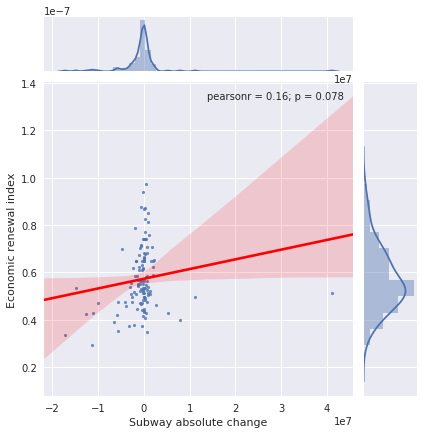

In [134]:
a = seaborn.jointplot("subway_change_abs", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Subway absolute change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Subway change rate')

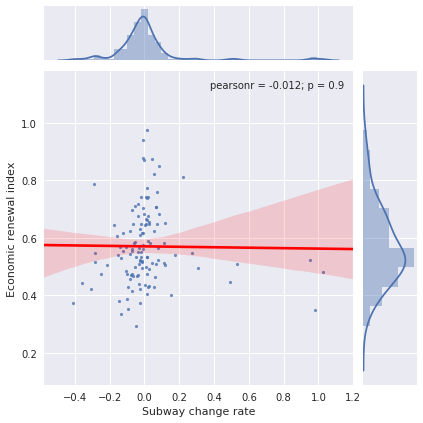

In [135]:
a = seaborn.jointplot("subway_change_rate", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Subway change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'yellow taxi absolute change')

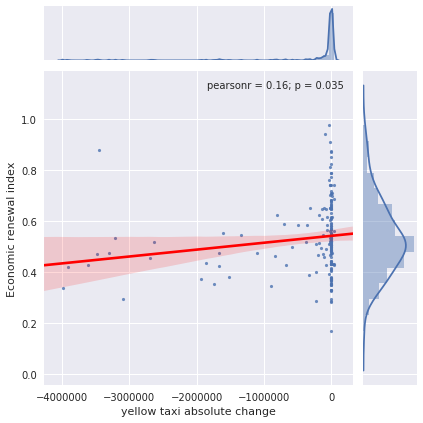

In [136]:
a = seaborn.jointplot("yellowTaxi_change_abs", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("yellow taxi absolute change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Yellow taxi change rate')

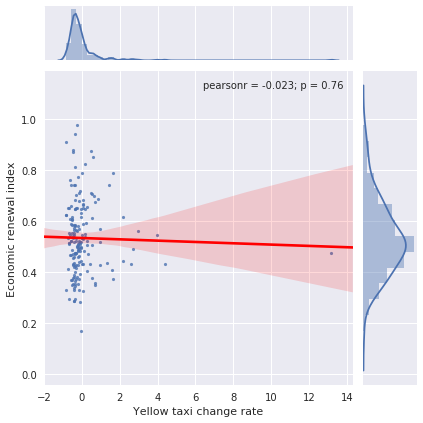

In [137]:
a = seaborn.jointplot("yellowTaxi_change_rate", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Yellow taxi change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Private Vehicle change absolute')

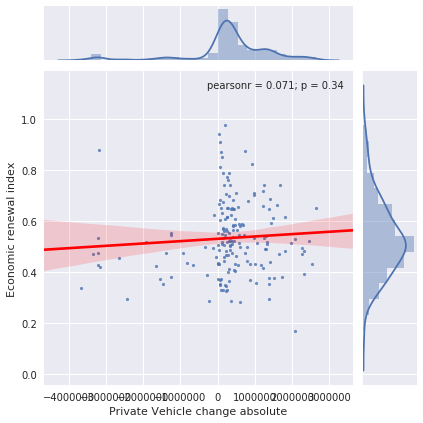

In [138]:
a = seaborn.jointplot("privateVehicle_change_abs", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Private Vehicle change absolute")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Private Vehicle change rate')

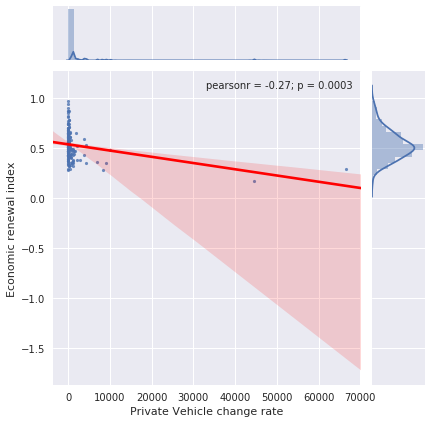

In [139]:
a = seaborn.jointplot("privateVehicle_change_rate", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Private Vehicle change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change normalized by area')

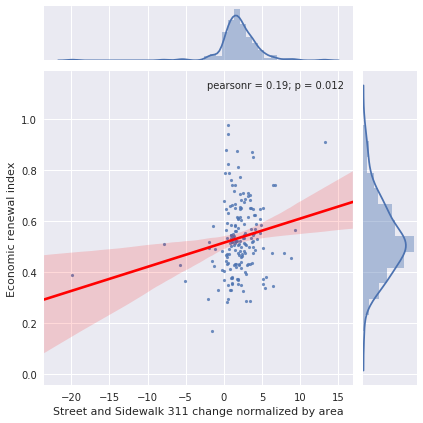

In [140]:
a = seaborn.jointplot("SS_change_area", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Street and Sidewalk 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change normalized by population')

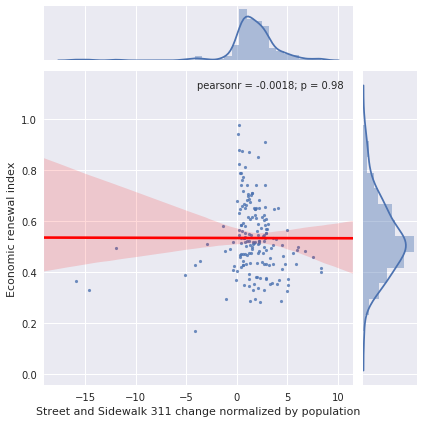

In [141]:
a = seaborn.jointplot("SS_change_pop", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Street and Sidewalk 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change')

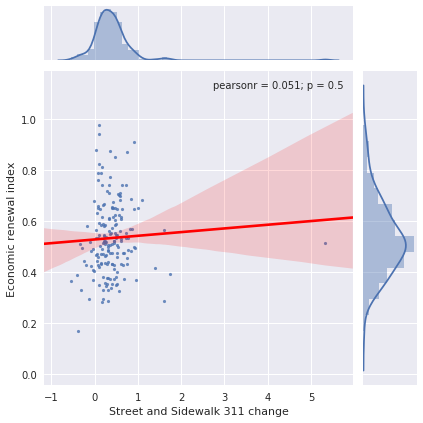

In [142]:
a = seaborn.jointplot("SS_change_rate", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Street and Sidewalk 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Robbery percent change')

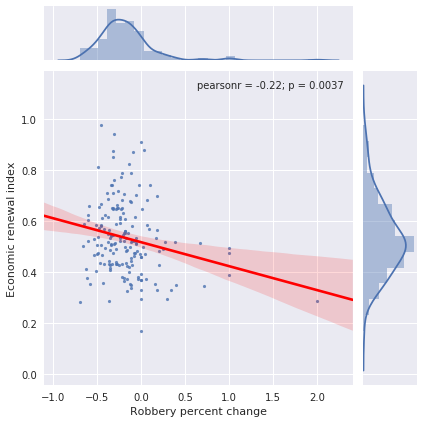

In [143]:
a = seaborn.jointplot("robbery_change_rate", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Robbery percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Robbery change')

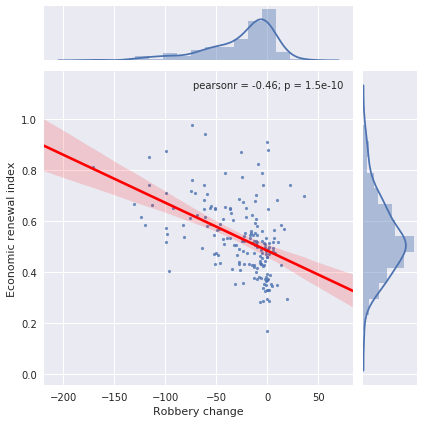

In [144]:
a = seaborn.jointplot("robbery_change_abs", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Robbery change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Petit Larceny percent change')

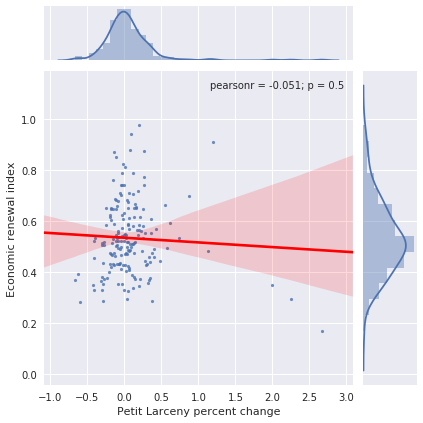

In [145]:
a = seaborn.jointplot("petit_larceny_change_rate", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Petit Larceny percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Petit Larceny change')

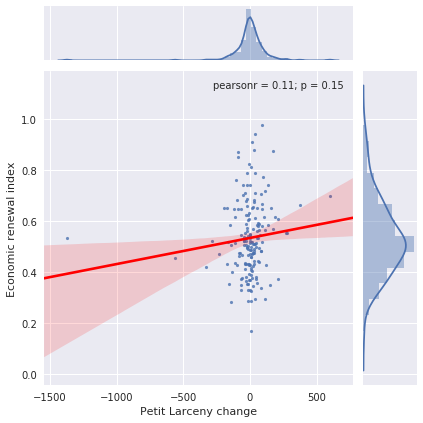

In [146]:
a = seaborn.jointplot("petit_larceny_change_abs", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Petit Larceny change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Drug crimes percent change')

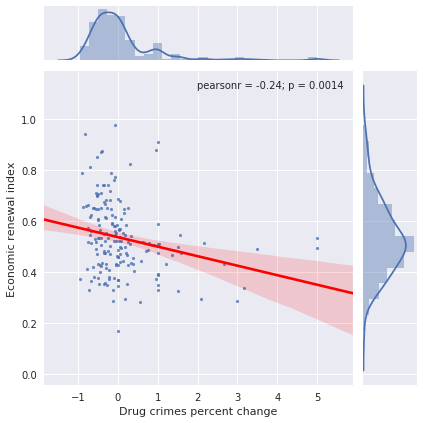

In [147]:
a = seaborn.jointplot("drug_change_rate", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Drug crimes percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Drug crimes change')

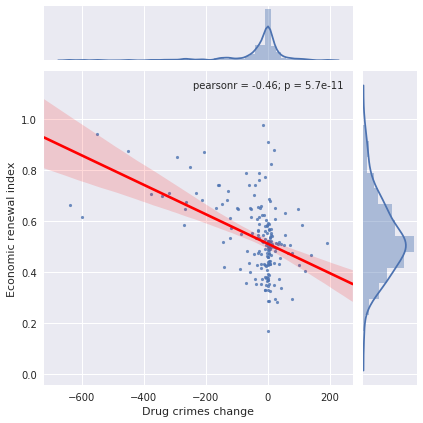

In [148]:
a = seaborn.jointplot("drug_change_abs", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Economic renewal index")
pl.xlabel("Drug crimes change")

# Now just for rent increase (Average 2017 / Average 2013)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change')

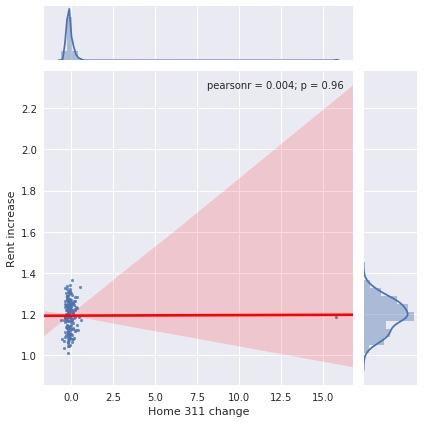

In [149]:
a = seaborn.jointplot("H_change_rate", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Home 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change normalized by population')

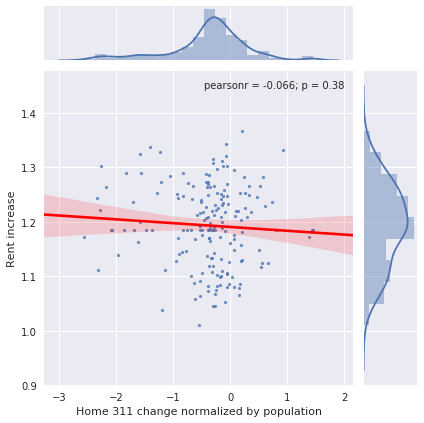

In [150]:
a = seaborn.jointplot("H_change_pop", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Home 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change normalized by area')

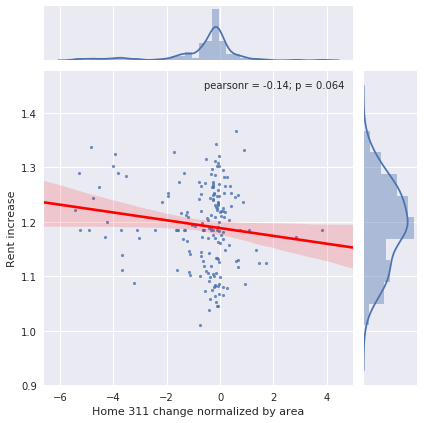

In [151]:
a = seaborn.jointplot("H_change_area", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Home 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change')

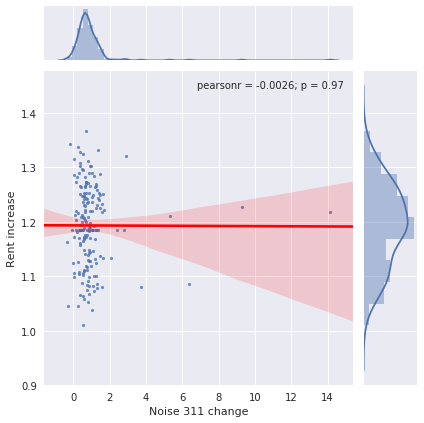

In [152]:
a = seaborn.jointplot("N_change_rate", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Noise 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change normalized by population')

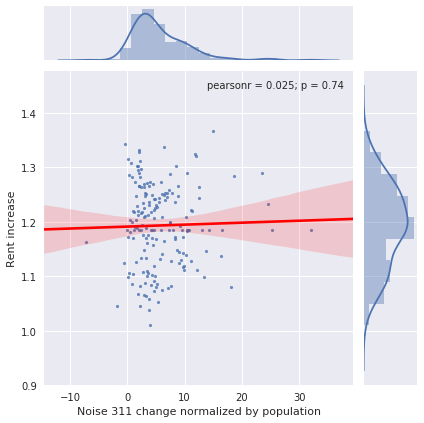

In [153]:
a = seaborn.jointplot("N_change_pop", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Noise 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change normalized by area')

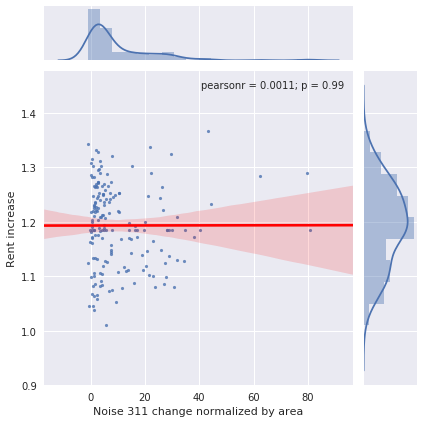

In [154]:
a = seaborn.jointplot("N_change_area", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Noise 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change')

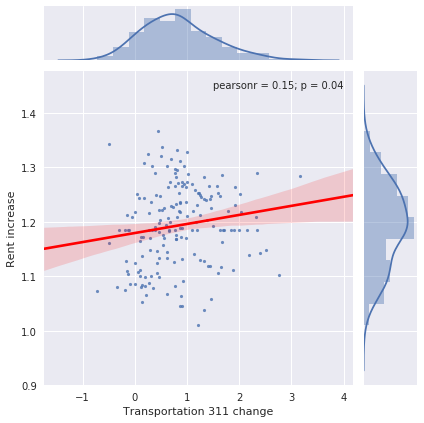

In [155]:
a = seaborn.jointplot("T_change_rate", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Transportation 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change normalized by population')

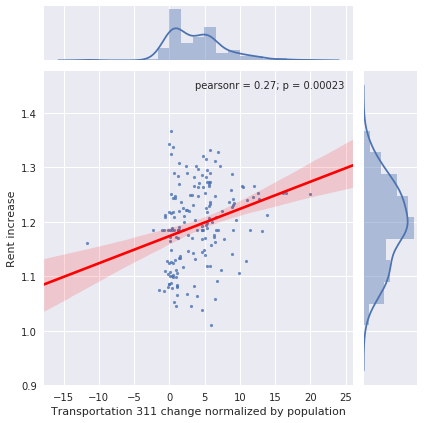

In [156]:
a = seaborn.jointplot("T_change_pop", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Transportation 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change normalized by area')

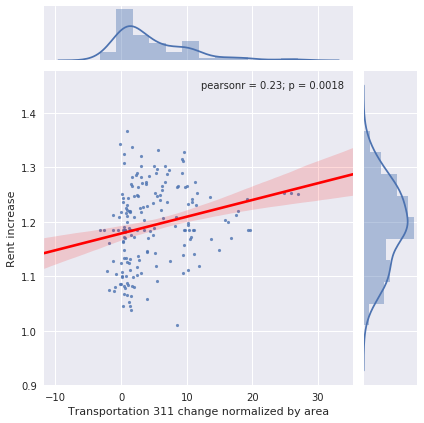

In [157]:
a = seaborn.jointplot("T_change_area", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Transportation 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change')

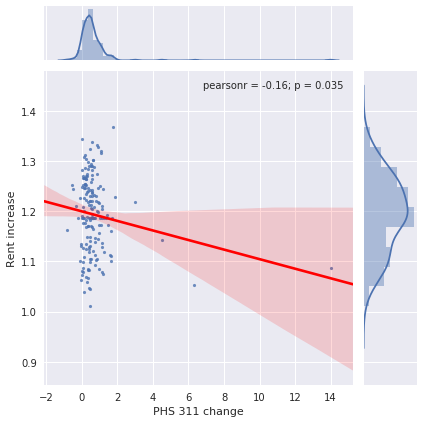

In [158]:
a = seaborn.jointplot("PHS_change_rate", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("PHS 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change normalized by population')

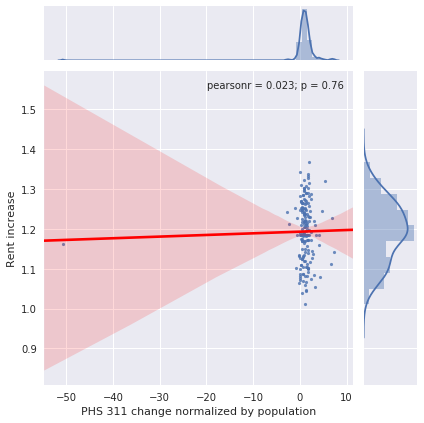

In [159]:
a = seaborn.jointplot("PHS_change_pop", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("PHS 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change normalized by area')

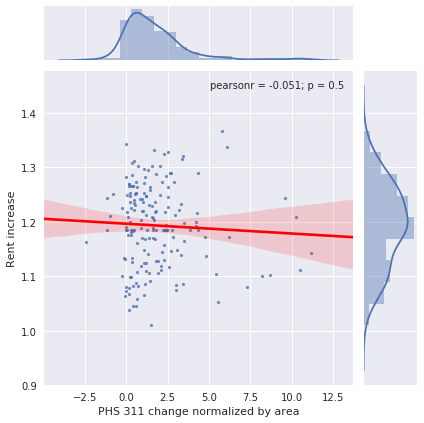

In [160]:
a = seaborn.jointplot("PHS_change_area", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("PHS 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change')

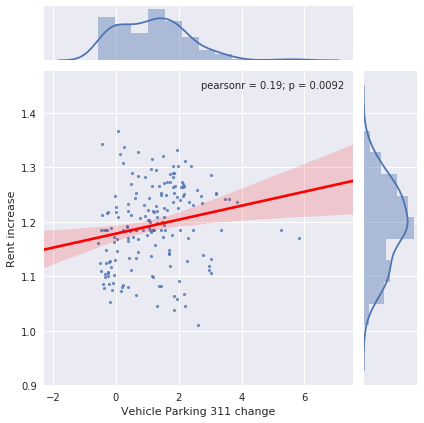

In [161]:
a = seaborn.jointplot("VP_change_rate", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Vehicle Parking 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change normalized by population')

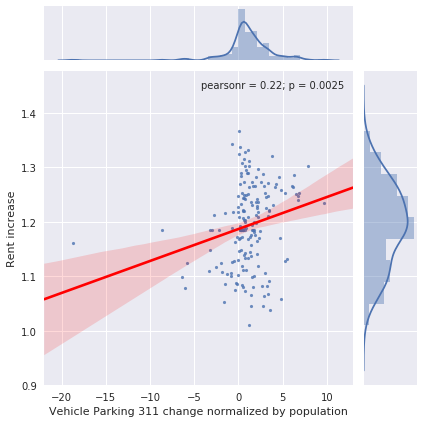

In [162]:
a = seaborn.jointplot("VP_change_pop", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Vehicle Parking 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change normalized by area')

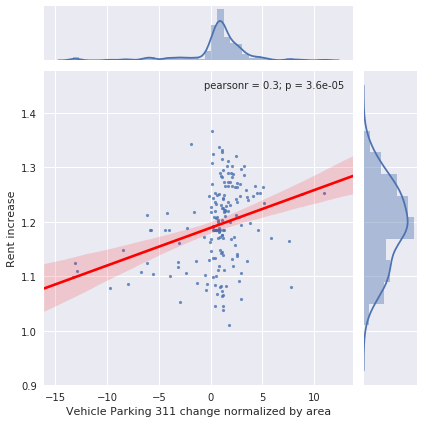

In [163]:
a = seaborn.jointplot("VP_change_area", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Vehicle Parking 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Master Card growth rank')

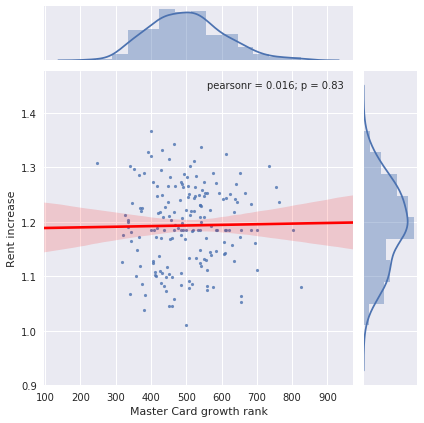

In [164]:
a = seaborn.jointplot("MasterCard_growth_rank", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Master Card growth rank")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Subway absolute change')

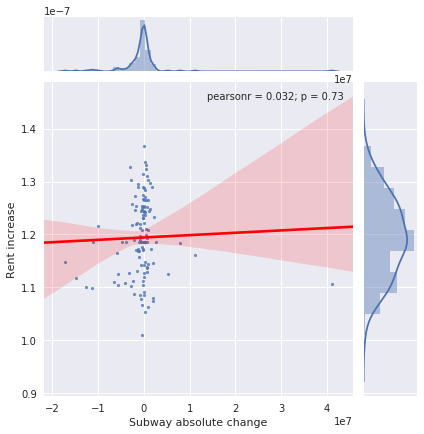

In [165]:
a = seaborn.jointplot("subway_change_abs", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Subway absolute change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Subway change rate')

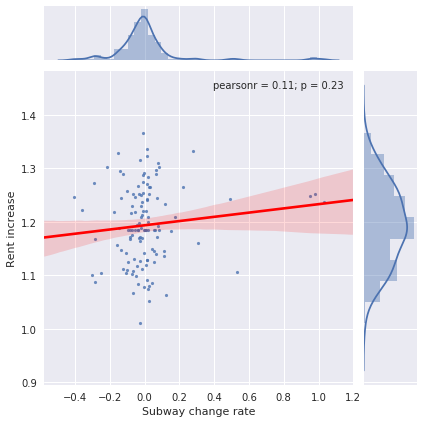

In [166]:
a = seaborn.jointplot("subway_change_rate", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Subway change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'yellow taxi absolute change')

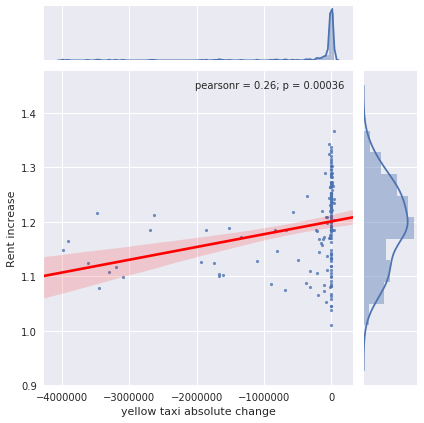

In [167]:
a = seaborn.jointplot("yellowTaxi_change_abs", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("yellow taxi absolute change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Yellow taxi change rate')

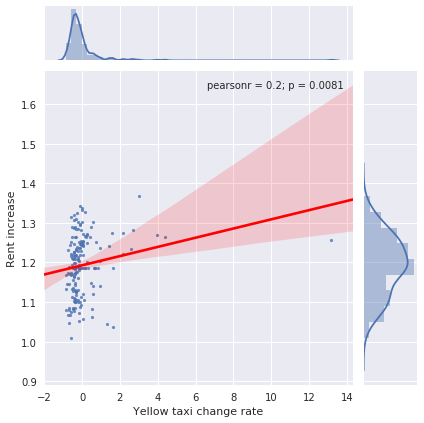

In [168]:
a = seaborn.jointplot("yellowTaxi_change_rate", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Yellow taxi change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Private Vehicle change absolute')

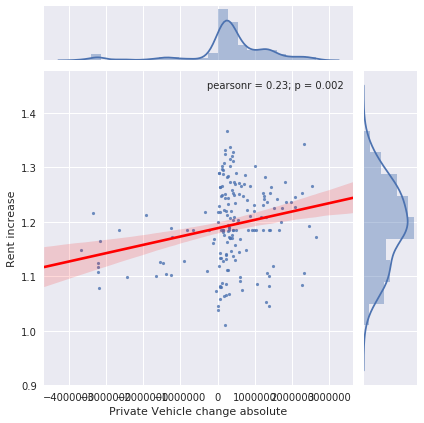

In [169]:
a = seaborn.jointplot("privateVehicle_change_abs", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Private Vehicle change absolute")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Private Vehicle change rate')

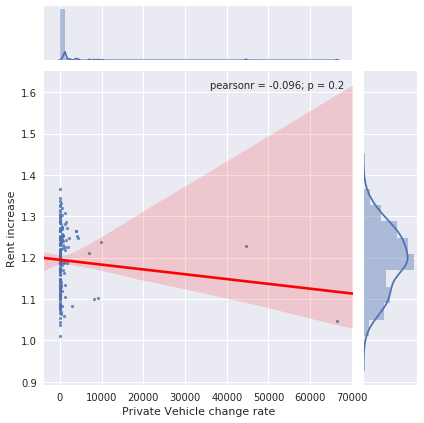

In [170]:
a = seaborn.jointplot("privateVehicle_change_rate", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Private Vehicle change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change normalized by area')

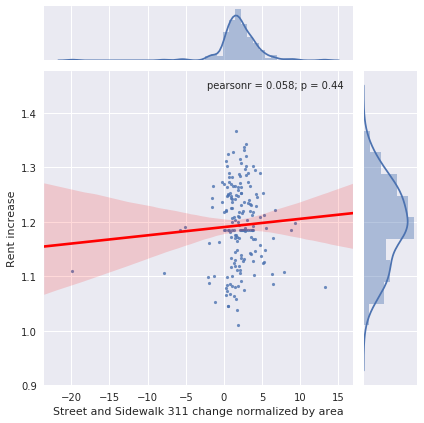

In [171]:
a = seaborn.jointplot("SS_change_area", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Street and Sidewalk 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change normalized by population')

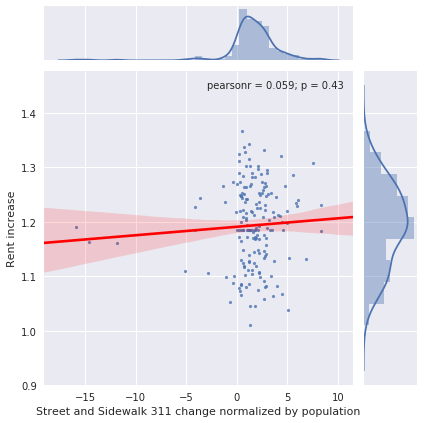

In [172]:
a = seaborn.jointplot("SS_change_pop", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Street and Sidewalk 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change')

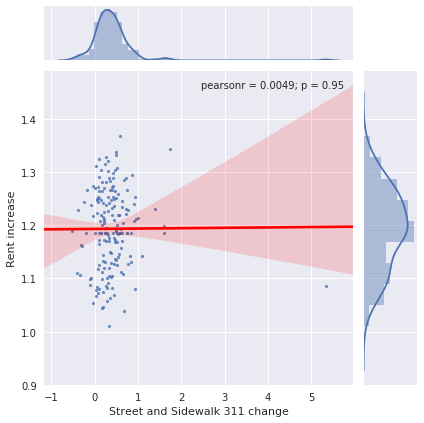

In [173]:
a = seaborn.jointplot("SS_change_rate", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Street and Sidewalk 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Robbery percent change')

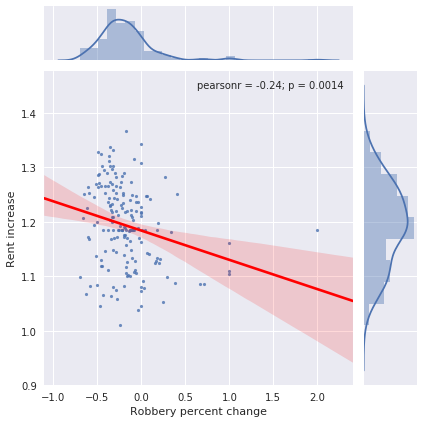

In [174]:
a = seaborn.jointplot("robbery_change_rate", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Robbery percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Robbery change')

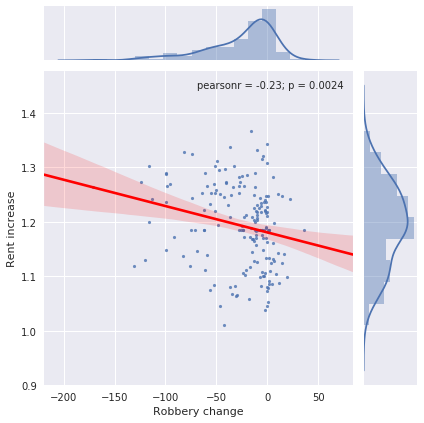

In [175]:
a = seaborn.jointplot("robbery_change_abs", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Robbery change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Petit Larceny percent change')

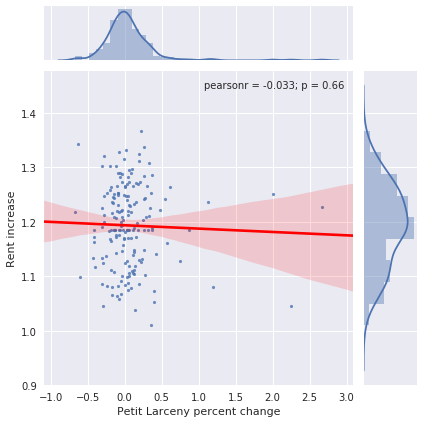

In [176]:
a = seaborn.jointplot("petit_larceny_change_rate", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Petit Larceny percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Petit Larceny change')

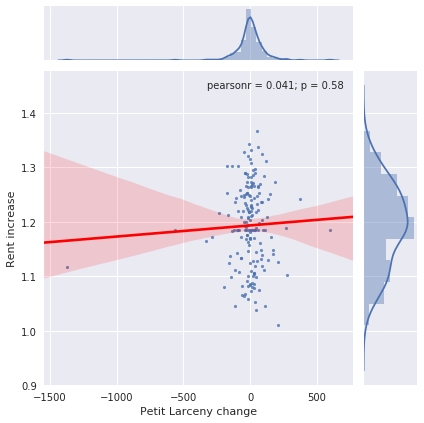

In [177]:
a = seaborn.jointplot("petit_larceny_change_abs", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Petit Larceny change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Drug crimes percent change')

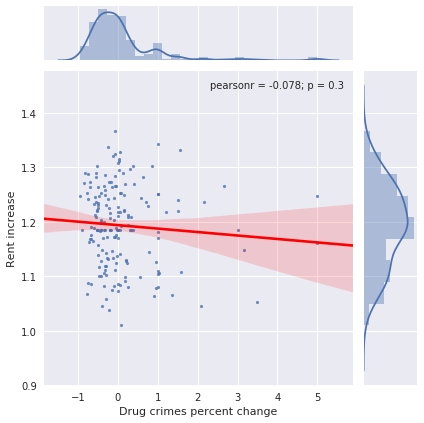

In [178]:
a = seaborn.jointplot("drug_change_rate", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Drug crimes percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Drug crimes change')

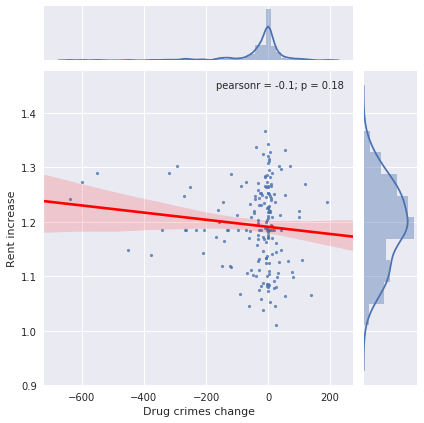

In [179]:
a = seaborn.jointplot("drug_change_abs", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent increase")
pl.xlabel("Drug crimes change")

# Now just for the urban landscape renovation index 

## (1.5 * New Buildings + Major renovations) / (Total building permits * sqrt(Zip Code Area))

In [180]:
df.head()

Unnamed: 0  zipcode  renovation_index  renovation_index_with_rent  \
0           0    10025          4.770022                    5.259394   
1           1    10023          5.238509                    5.902964   
2           2    10002          9.586100                   10.818387   
3           3    10467         13.927773                   15.485280   
4           4    11226         28.565119                   34.266632   

   drug_change_abs  drug_change_rate  petit_larceny_change_abs  \
0              -50         -0.294118                       278   
1               36          0.947368                       210   
2               64          0.205788                        23   
3              -28         -0.060086                       104   
4             -158         -0.342733                       -49   

   petit_larceny_change_rate  robbery_change_abs  robbery_change_rate  \
0                   0.282234                 -22            -0.150685   
1                   0.216942                 -10            -0.161290   
2                   0.027545                 -13            -0.071429   
3                   0.134194                 -21            -0.069307   
4                  -0.052128                -116            -0.328612   

            ...              Zip  business_renewal  count_new_buildings  \
0           ...            10025          0.553707                 82.0   
1           ...            10023          0.374745                168.0   
2           ...            10002          0.473819                559.0   
3           ...            10467          0.615942                501.0   
4           ...            11226          0.741337                868.0   

   rent_increase  count_major_renovation  average_rent_2017  \
0       1.102593                   400.0        3553.750000   
1       1.126840                   562.0        3858.583333   
2       1.128549                   485.0        3699.666667   
3       1.111827                   261.0        1739.083333   
4       1.199597                   474.0        2183.166667   

   average_rent_2013                                           geometry  \
0        3223.083333  POLYGON ((995501.6553063095 232971.115144223, ...   
1        3424.250000  POLYGON ((986170.3206225634 221389.1589774638,...   
2        3278.250000  POLYGON ((991339.8703228086 207576.7837151289,...   
3        1564.166667  POLYGON ((1017396.305742651 265444.4701448828,...   
4        1819.916667  POLYGON ((994821.4729396403 177865.7178093046,...   

           AREA  Total_building_permits  
0  1.963104e+07                   12628  
1  1.521271e+07                   13389  
2  2.628013e+07                   10066  
3  6.933617e+07                    4047  
4  3.940860e+07                    5548  

[5 rows x 45 columns]

In [181]:
df["Urban_landscape_renewal"] = ((1.5 * df.count_new_buildings) + (df.count_major_renovation)) / ((df.Total_building_permits) * (df.AREA ** 0.5))
                                                                                                  
                                                                                                  
                                                                                                  
                                                                                                  

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change')

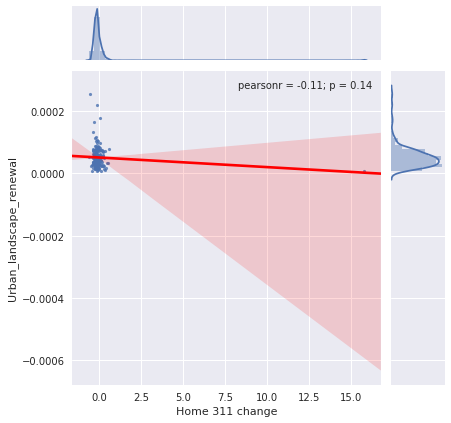

In [182]:
a = seaborn.jointplot("H_change_rate", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Home 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change normalized by population')

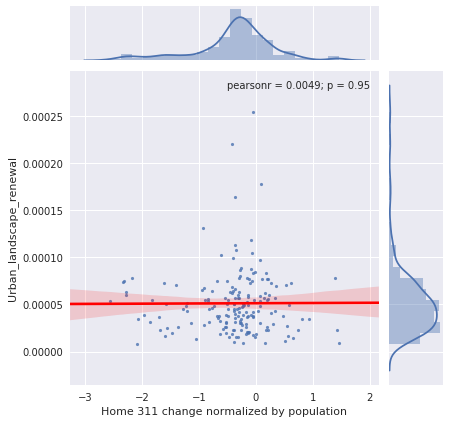

In [183]:
a = seaborn.jointplot("H_change_pop", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Home 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home 311 change normalized by area')

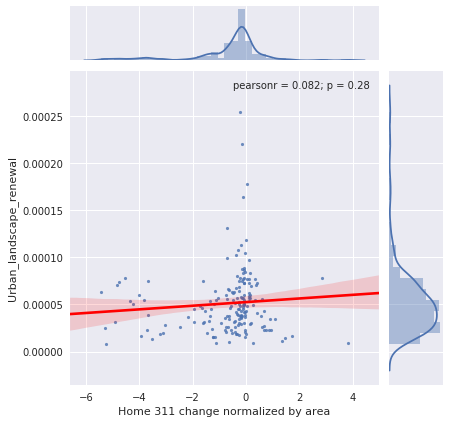

In [184]:
a = seaborn.jointplot("H_change_area", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Home 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change')

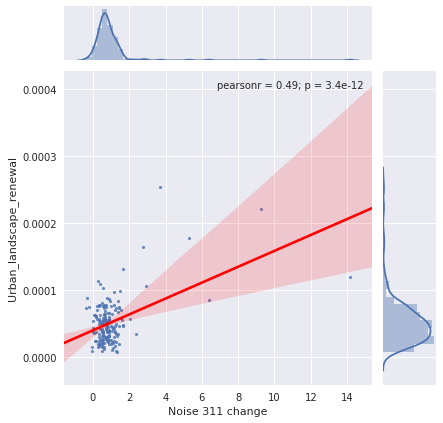

In [185]:
a = seaborn.jointplot("N_change_rate", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Noise 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change normalized by population')

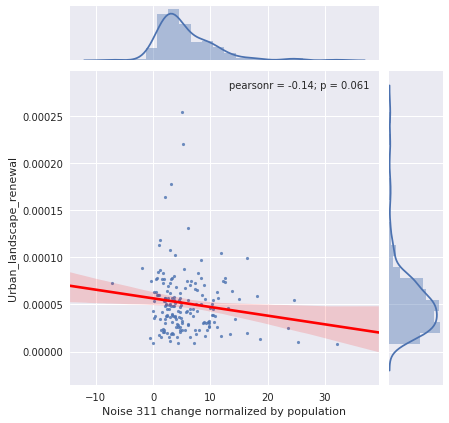

In [186]:
a = seaborn.jointplot("N_change_pop", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Noise 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise 311 change normalized by area')

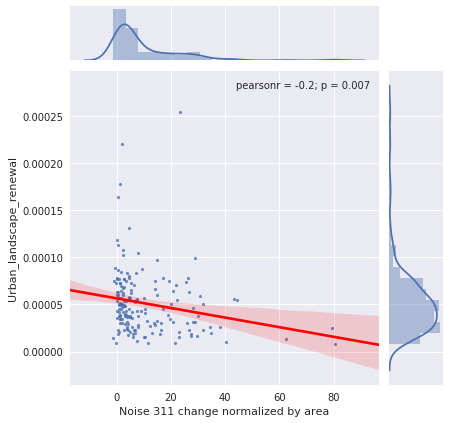

In [187]:
a = seaborn.jointplot("N_change_area", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Noise 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change')

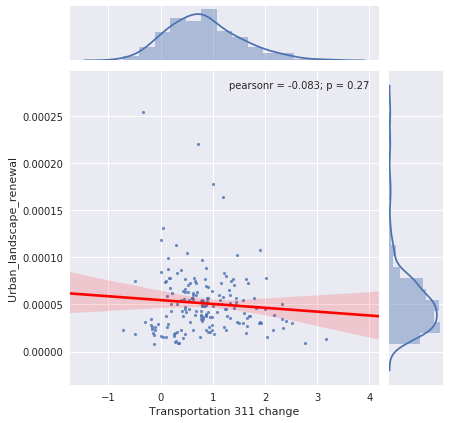

In [188]:
a = seaborn.jointplot("T_change_rate", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Transportation 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change normalized by population')

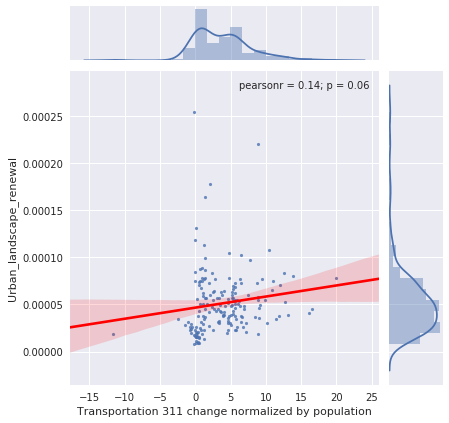

In [189]:
a = seaborn.jointplot("T_change_pop", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Transportation 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation 311 change normalized by area')

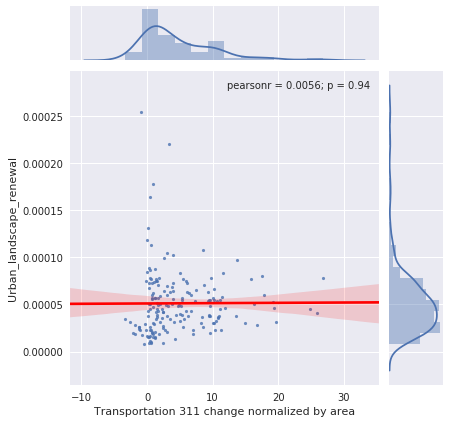

In [190]:
a = seaborn.jointplot("T_change_area", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Transportation 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change')

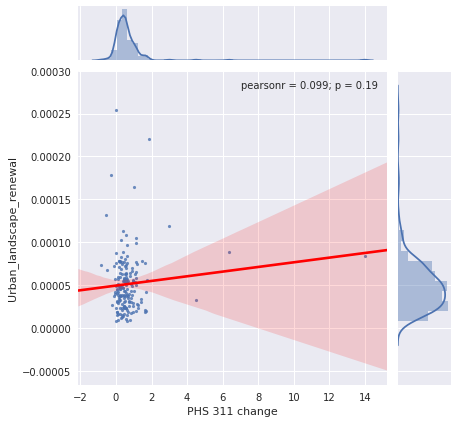

In [191]:
a = seaborn.jointplot("PHS_change_rate", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("PHS 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change normalized by population')

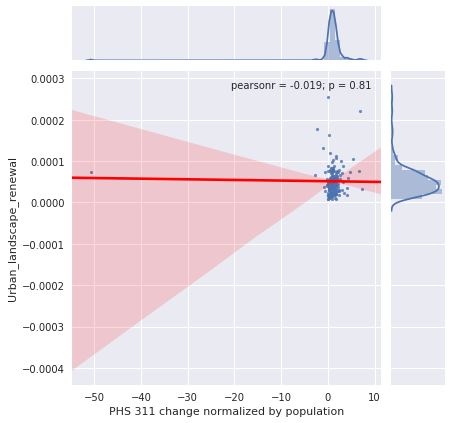

In [192]:
a = seaborn.jointplot("PHS_change_pop", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("PHS 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'PHS 311 change normalized by area')

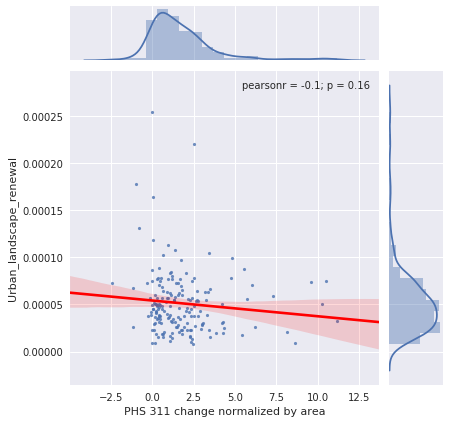

In [193]:
a = seaborn.jointplot("PHS_change_area", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("PHS 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change')

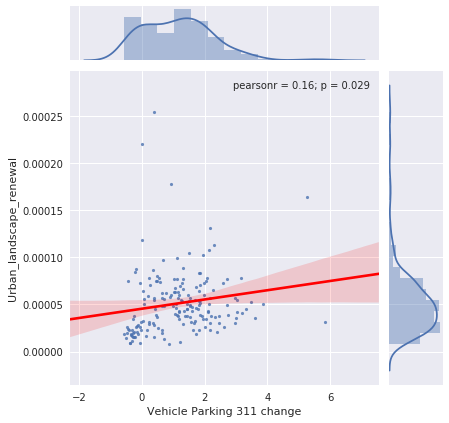

In [194]:
a = seaborn.jointplot("VP_change_rate", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Vehicle Parking 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change normalized by population')

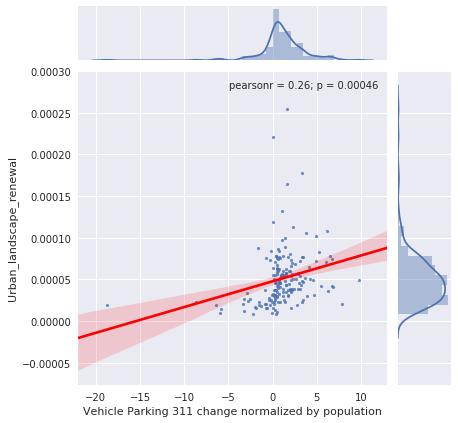

In [195]:
a = seaborn.jointplot("VP_change_pop", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Vehicle Parking 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicle Parking 311 change normalized by area')

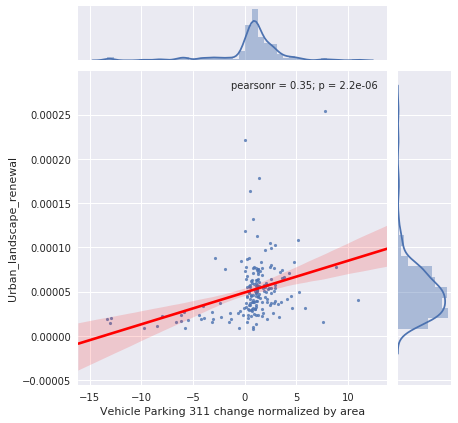

In [196]:
a = seaborn.jointplot("VP_change_area", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Vehicle Parking 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Master Card growth rank')

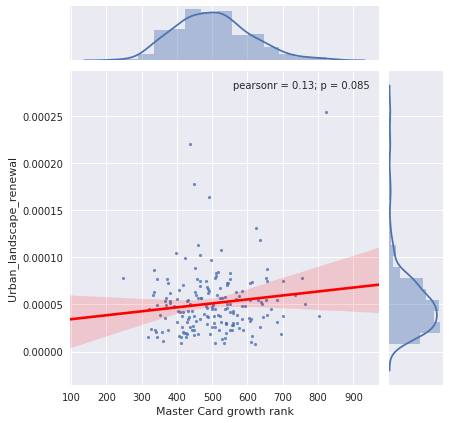

In [197]:
a = seaborn.jointplot("MasterCard_growth_rank", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Master Card growth rank")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Subway absolute change')

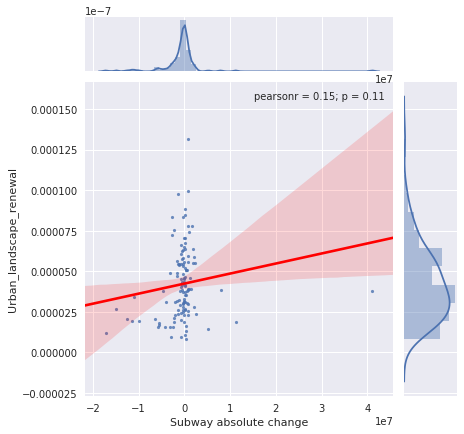

In [198]:
a = seaborn.jointplot("subway_change_abs", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Subway absolute change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Subway change rate')

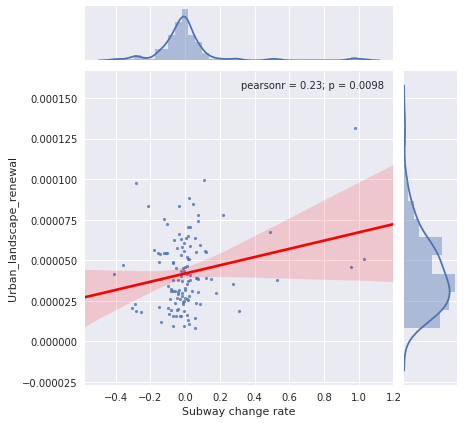

In [199]:
a = seaborn.jointplot("subway_change_rate", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Subway change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'yellow taxi absolute change')

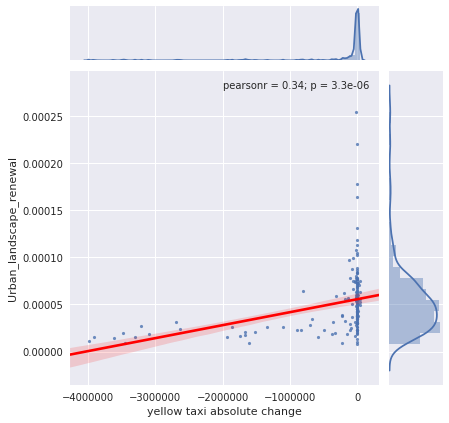

In [200]:
a = seaborn.jointplot("yellowTaxi_change_abs", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("yellow taxi absolute change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Yellow taxi change rate')

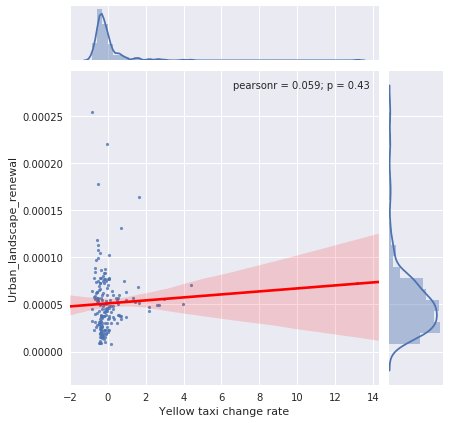

In [201]:
a = seaborn.jointplot("yellowTaxi_change_rate", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Yellow taxi change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Private Vehicle change absolute')

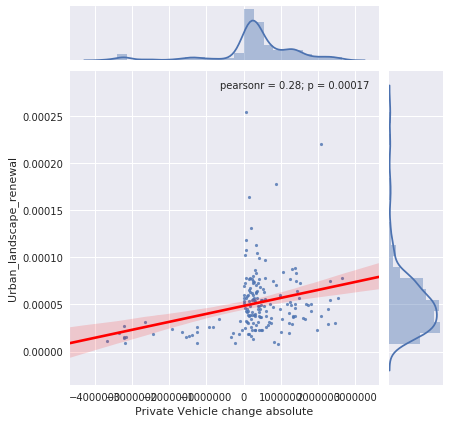

In [202]:
a = seaborn.jointplot("privateVehicle_change_abs", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Private Vehicle change absolute")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Private Vehicle change rate')

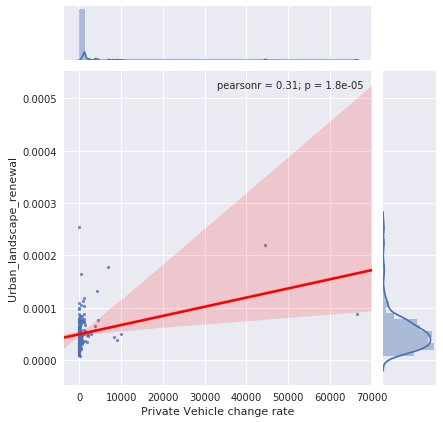

In [203]:
a = seaborn.jointplot("privateVehicle_change_rate", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Private Vehicle change rate")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change normalized by area')

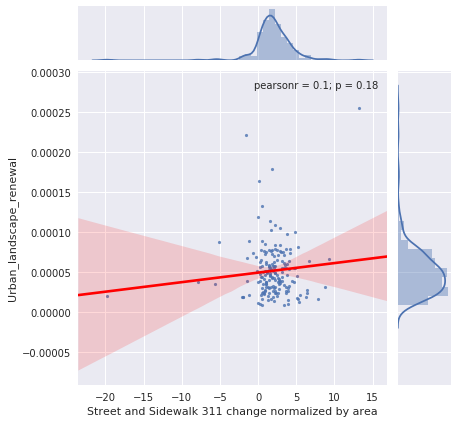

In [204]:
a = seaborn.jointplot("SS_change_area", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Street and Sidewalk 311 change normalized by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change normalized by population')

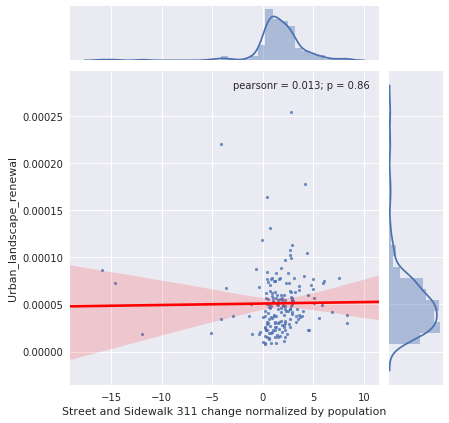

In [205]:
a = seaborn.jointplot("SS_change_pop", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Street and Sidewalk 311 change normalized by population")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Street and Sidewalk 311 change')

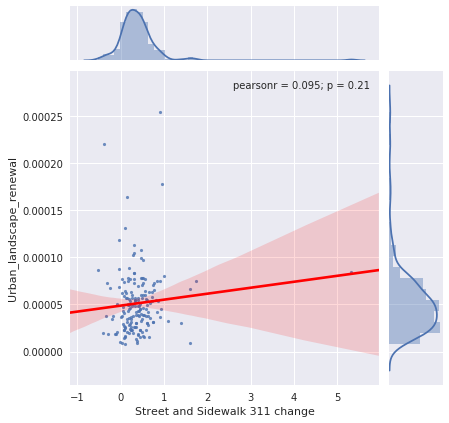

In [206]:
a = seaborn.jointplot("SS_change_rate", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Street and Sidewalk 311 change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Robbery percent change')

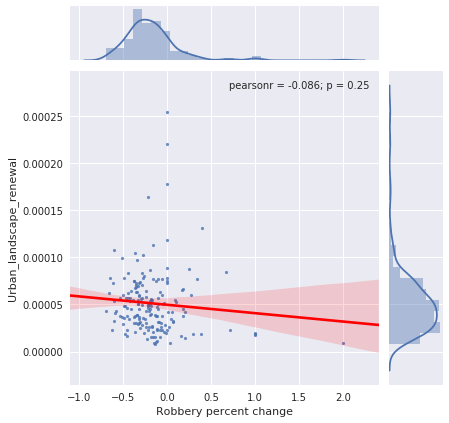

In [207]:
a = seaborn.jointplot("robbery_change_rate", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Robbery percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Robbery change')

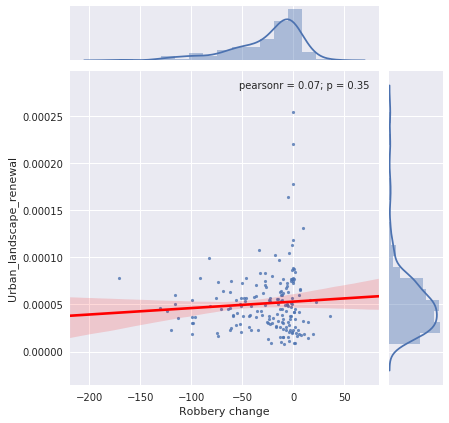

In [208]:
a = seaborn.jointplot("robbery_change_abs", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Robbery change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Petit Larceny percent change')

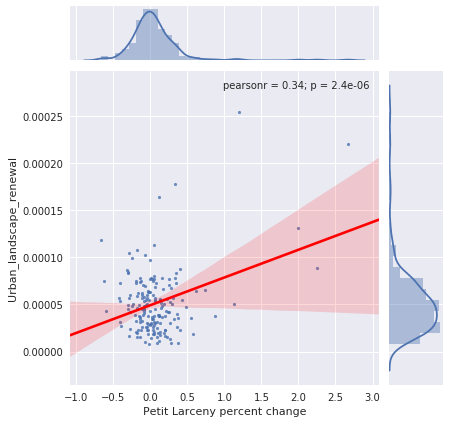

In [209]:
a = seaborn.jointplot("petit_larceny_change_rate", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Petit Larceny percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Petit Larceny change')

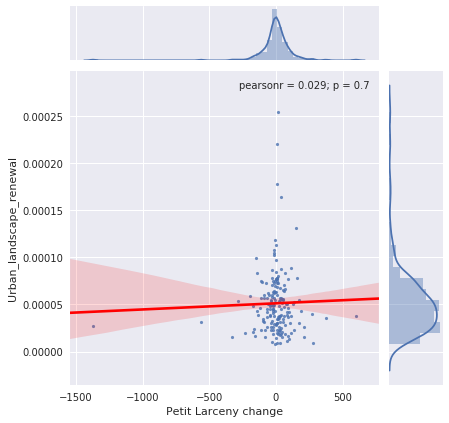

In [210]:
a = seaborn.jointplot("petit_larceny_change_abs", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Petit Larceny change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Drug crimes percent change')

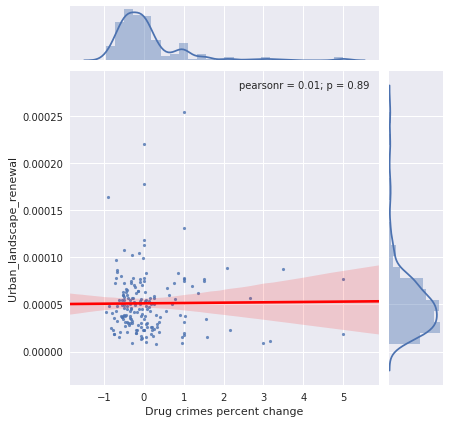

In [211]:
a = seaborn.jointplot("drug_change_rate", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Drug crimes percent change")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Drug crimes change')

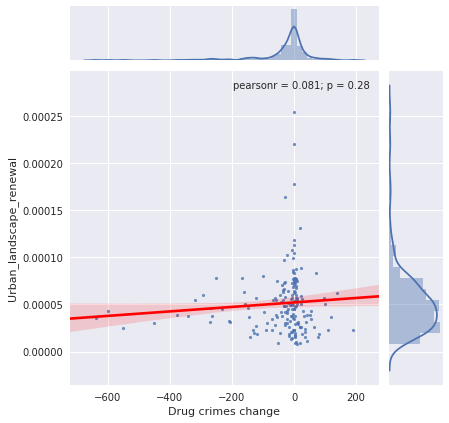

In [212]:
a = seaborn.jointplot("drug_change_abs", "Urban_landscape_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Urban_landscape_renewal")
pl.xlabel("Drug crimes change")

# Apparently thecomponent of the index that works best with the considered variables is the Economic renovation index. Let's run a model just with it and some of the statistically significant variables

In [213]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'renovation_index',
       'renovation_index_with_rent', 'drug_change_abs', 'drug_change_rate',
       'petit_larceny_change_abs', 'petit_larceny_change_rate',
       'robbery_change_abs', 'robbery_change_rate', 'SS_change_rate',
       'H_change_rate', 'N_change_rate', 'T_change_rate', 'PHS_change_rate',
       'VP_change_rate', 'SS_change_pop', 'H_change_pop', 'N_change_pop',
       'T_change_pop', 'PHS_change_pop', 'VP_change_pop', 'SS_change_area',
       'H_change_area', 'N_change_area', 'T_change_area', 'PHS_change_area',
       'VP_change_area', 'MasterCard_growth_rank', 'subway_change_abs',
       'subway_change_rate', 'yellowTaxi_change_abs', 'yellowTaxi_change_rate',
       'privateVehicle_change_abs', 'privateVehicle_change_rate', 'Zip',
       'business_renewal', 'count_new_buildings', 'rent_increase',
       'count_major_renovation', 'average_rent_2017', 'average_rent_2013',
       'geometry', 'AREA', 'Total_building_permits',
       'Urban_

In [214]:
lm = smf.ols('business_renewal ~ robbery_change_abs + drug_change_abs + T_change_area  + N_change_pop + H_change_area + MasterCard_growth_rank',data=df).fit()


lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_renewal   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     32.44
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           5.91e-26
Time:                        14:37:58   Log-Likelihood:                 163.34
No. Observations:                 179   AIC:                            -312.7
Df Residuals:                     172   BIC:                            -290.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0.2716      0.038      7.212      0.000         0.197     0.346
robbery_change_abs        -0.0005      0.000     -2.054      0.041        -0.001 -2.06e-05
drug_change_abs           -0.0002   7.69e-05     -2.344      0.020        -0.000 -2.85e-05
T_change_area              0.0058      0.001      3.958      0.000         0.003     0.009
N_change_pop               0.0054      0.002      3.245      0.001         0.002     0.009
H_change_area             -0.0218      0.006     -3.659      0.000        -0.034    -0.010
MasterCard_growth_rank     0.0003   7.96e-05      4.200      0.000         0.000     0.000
==============================================================================
Omnibus:                       26.610   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.225
Skew:                           0.626   Prob(JB):                     1.13e-14
Kurtosis:                       5.654   Cond. No.                     2.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# WOOOWWWWWWW It appears like all the variables in the model are statistically significant at a 5% confidence level and we get an R squared of over 0.50. Meaninig that with this set of 6 variables we can explain at a 50% the Economic Renovation index for a Zip Code in NYC.

# It is important to recognize that this by itself is not gentrification, but it seems very cool, and economic renovations is a part of gentrification that cannot be underestimated, specially for banks and people interested in increasing their financial services in an area.